# Assignment 2 : Auto ML

## Name : Abhishek Singh NUID : 002818640

**About DataSet**

It encompasses a wide array of player-specific data points, including but not limited to player names, nationalities, clubs, player ratings, potential, positions, ages, and various skill attributes. This dataset is ideal for football enthusiasts, data analysts, and researchers seeking to conduct in-depth analysis, statistical studies, or machine learning projects related to football players' performance, characteristics, and career progressions.

**Features:**

name: Name of the player.
full_name: Full name of the player.
birth_date: Date of birth of the player.
age: Age of the player.
height_cm: Player's height in centimeters.
weight_kgs: Player's weight in kilograms.
positions: Positions the player can play.
nationality: Player's nationality.
overall_rating: Overall rating of the player in FIFA.
potential: Potential rating of the player in FIFA.
value_euro: Market value of the player in euros.
wage_euro: Weekly wage of the player in euros.
preferred_foot: Player's preferred foot.
international_reputation(1-5): International reputation rating from 1 to 5.
weak_foot(1-5): Rating of the player's weaker foot from 1 to 5.
skill_moves(1-5): Skill moves rating from 1 to 5.
body_type: Player's body type.
release_clause_euro: Release clause of the player in euros.
national_team: National team of the player.
national_rating: Rating in the national team.
national_team_position: Position in the national team.
national_jersey_number: Jersey number in the national team.
crossing: Rating for crossing ability.
finishing: Rating for finishing ability.
heading_accuracy: Rating for heading accuracy.
short_passing: Rating for short passing ability.
volleys: Rating for volleys.
dribbling: Rating for dribbling.
curve: Rating for curve shots.
freekick_accuracy: Rating for free kick accuracy.
long_passing: Rating for long passing.
ball_control: Rating for ball control.
acceleration: Rating for acceleration.
sprint_speed: Rating for sprint speed.
agility: Rating for agility.
reactions: Rating for reactions.
balance: Rating for balance.
shot_power: Rating for shot power.
jumping: Rating for jumping.
stamina: Rating for stamina.
strength: Rating for strength.
long_shots: Rating for long shots.
aggression: Rating for aggression.
interceptions: Rating for interceptions.
positioning: Rating for positioning.
vision: Rating for vision.
penalties: Rating for penalties.
composure: Rating for composure.
marking: Rating for marking.
standing_tackle: Rating for standing tackle.
sliding_tackle: Rating for sliding tackle.

In [103]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [104]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [105]:
!pip install yellowbrick

In [106]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
#import warnings warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [107]:
min_mem_size=6
run_time=222

In [108]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [109]:
import random
import logging
import sys
import h2o

# Generate a random port number
port_no = random.randint(5555, 55555)

try:
    # Start H2O cluster
    h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no)
except Exception as e:
    logging.critical('Failed to initialize H2O cluster: %s', str(e))
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)


Checking whether there is an H2O instance running at http://localhost:10941..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpw5sm_61r
  JVM stdout: /tmp/tmpw5sm_61r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpw5sm_61r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:10941
Connecting to H2O server at http://127.0.0.1:10941 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_wn9gz4
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:10941
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [110]:

# Import the data using H2O.ai
url = 'https://raw.githubusercontent.com/AbhiSingh378/FIFA_Assign/main/fifadata.csv'
data = h2o.import_file(path=url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [111]:
data.head()

age    height_cm    weight_kgs  positions    nationality      overall_rating    potential    value_euro    wage_euro    international_reputation(1-5)    weak_foot(1-5)    skill_moves(1-5)  body_type      crossing    finishing    heading_accuracy    short_passing    volleys    dribbling    curve    freekick_accuracy    long_passing    ball_control    acceleration    sprint_speed    agility    reactions    balance    shot_power    jumping    stamina    strength    long_shots    aggression    interceptions    positioning    vision    penalties    composure    marking    standing_tackle    sliding_tackle
-----  -----------  ------------  -----------  -------------  ----------------  -----------  ------------  -----------  -------------------------------  ----------------  ------------------  -----------  ----------  -----------  ------------------  ---------------  ---------  -----------  -------  -------------------  --------------  --------------  --------------  --------------  ---------  -----------  ---------  ------------  ---------  ---------  ----------  ------------  ------------  ---------------  -------------  --------  -----------  -----------  ---------  -----------------  ----------------
   31       170.18          72.1  CF,RW,ST     Argentina                    94           94     1.105e+08       565000                                5                 4                   4  Messi                86           95                  70               92         86           97       93                   94              89              96              91              86         93           95         95            85         68         72          66            94            48               22             94        94           75           96         33                 28                26
   27       154.94          76.2  CAM,RM,CM    Denmark                      88           89     6.95e+07        205000                                3                 5                   4  Lean                 88           81                  52               91         80           84       86                   87              89              91              76              73         80           88         81            84         50         92          58            89            46               56             84        91           67           88         59                 57                22
   25       190.5           83.9  CM,CAM       France                       88           91     7.3e+07         255000                                4                 4                   5  Normal               80           75                  75               86         85           87       85                   82              90              90              71              79         76           82         66            90         83         88          87            82            78               64             82        88           82           87         63                 67                67
   27       162.56          59    LW,ST        Italy                        88           88     6.2e+07         165000                                3                 4                   4  Normal               86           77                  56               85         74           90       87                   77              78              93              94              86         94           83         93            75         53         75          44            84            34               26             83        87           61           83         51                 24                22
   27       187.96          88.9  CB           Senegal                      88           91     6e+07           135000                                3                 3                   2  Normal               30           22                  83               68         14           69       28                   28              60        

In [112]:
data.types

{'age': 'int',
 'height_cm': 'real',
 'weight_kgs': 'real',
 'positions': 'enum',
 'nationality': 'enum',
 'overall_rating': 'int',
 'potential': 'int',
 'value_euro': 'int',
 'wage_euro': 'int',
 'international_reputation(1-5)': 'int',
 'weak_foot(1-5)': 'int',
 'skill_moves(1-5)': 'int',
 'body_type': 'enum',
 'crossing': 'int',
 'finishing': 'int',
 'heading_accuracy': 'int',
 'short_passing': 'int',
 'volleys': 'int',
 'dribbling': 'int',
 'curve': 'int',
 'freekick_accuracy': 'int',
 'long_passing': 'int',
 'ball_control': 'int',
 'acceleration': 'int',
 'sprint_speed': 'int',
 'agility': 'int',
 'reactions': 'int',
 'balance': 'int',
 'shot_power': 'int',
 'jumping': 'int',
 'stamina': 'int',
 'strength': 'int',
 'long_shots': 'int',
 'aggression': 'int',
 'interceptions': 'int',
 'positioning': 'int',
 'vision': 'int',
 'penalties': 'int',
 'composure': 'int',
 'marking': 'int',
 'standing_tackle': 'int',
 'sliding_tackle': 'int'}

In [113]:
def count_null_values(data):

    # Check for missing values in each column
    missing_values_count = data.nacnt()

    # Create a dictionary to store column names and their corresponding null value counts
    null_values_dict = {}

    # Iterate through the columns of the H2OFrame
    for i, col_name in enumerate(data.columns):
        null_values_dict[col_name] = missing_values_count[i]

    return null_values_dict
# Call the function and pass your H2OFrame as an argument
null_values_count = count_null_values(data)

# Print the dictionary containing null value counts for each column
for key,value in null_values_count.items():
  print("{} : {}.".format(key.capitalize(), int(value)))


Age : 0.
Height_cm : 0.
Weight_kgs : 0.
Positions : 0.
Nationality : 0.
Overall_rating : 0.
Potential : 0.
Value_euro : 0.
Wage_euro : 0.
International_reputation(1-5) : 0.
Weak_foot(1-5) : 0.
Skill_moves(1-5) : 0.
Body_type : 0.
Crossing : 0.
Finishing : 0.
Heading_accuracy : 0.
Short_passing : 0.
Volleys : 0.
Dribbling : 0.
Curve : 0.
Freekick_accuracy : 0.
Long_passing : 0.
Ball_control : 0.
Acceleration : 0.
Sprint_speed : 0.
Agility : 0.
Reactions : 0.
Balance : 0.
Shot_power : 0.
Jumping : 0.
Stamina : 0.
Strength : 0.
Long_shots : 0.
Aggression : 0.
Interceptions : 0.
Positioning : 0.
Vision : 0.
Penalties : 0.
Composure : 0.
Marking : 0.
Standing_tackle : 0.
Sliding_tackle : 0.


In [114]:


# Define the replacement mapping
replacement_mapping = {
    "Messi": "Fat_15%",
    "Lean": "Fat_8%",
    "Normal": "Fat_15%",
    "Stocky": "Fat_15%",
    "Courtois": "Fat_20%",
    "PLAYER_BODY_TYPE_25": "Fat_20%",
    "Akinfenwa": "Fat_20%",
    "Shaqiri": "Fat_15%",
    "Neymar": "Fat_8%",
    "C. Ronaldo": "Fat_8%"
}

# Perform replacements using H2O's Python API
for old_val, new_val in replacement_mapping.items():
    data['body_type'] = (data['body_type'] == old_val).ifelse(new_val, data['body_type'])

# Check unique values after replacement
unique_body_type = data['body_type'].unique()
print("After Cleaning the Body_type data, Unique Values are :", unique_body_type)


After Cleaning the Body_type data, Unique Values are : C1
Fat_15%
Fat_20%
Fat_8%
[3 rows x 1 column]



Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


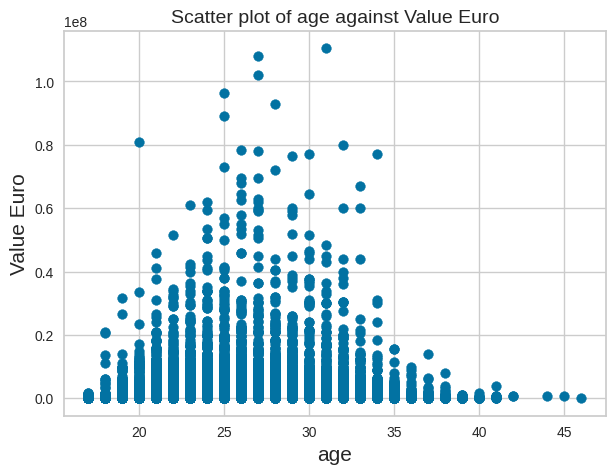

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


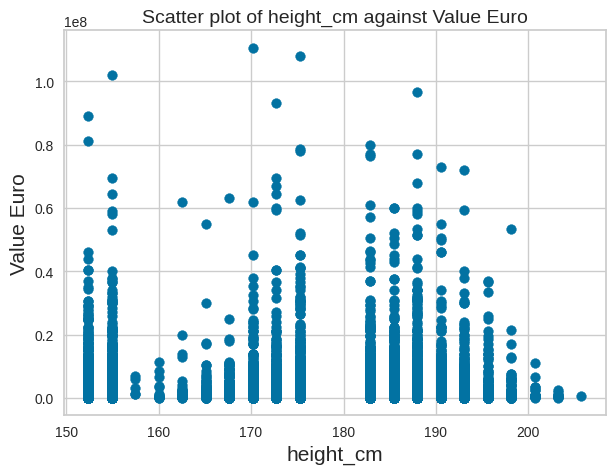

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


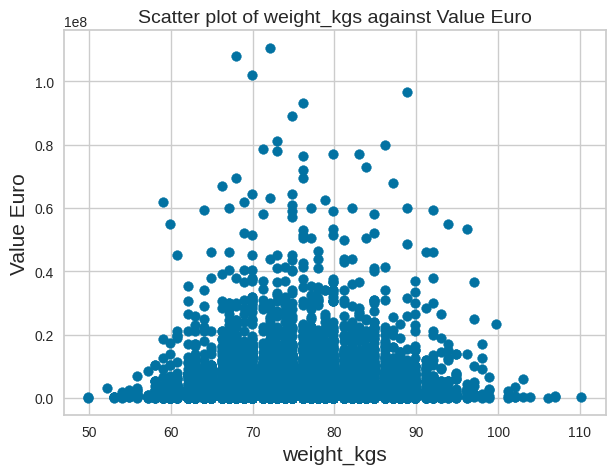

Skipping column positions as it does not contain scalar values.
Skipping column nationality as it does not contain scalar values.
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

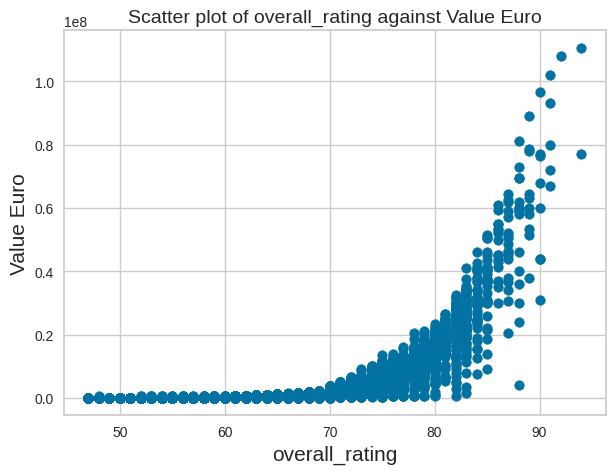

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


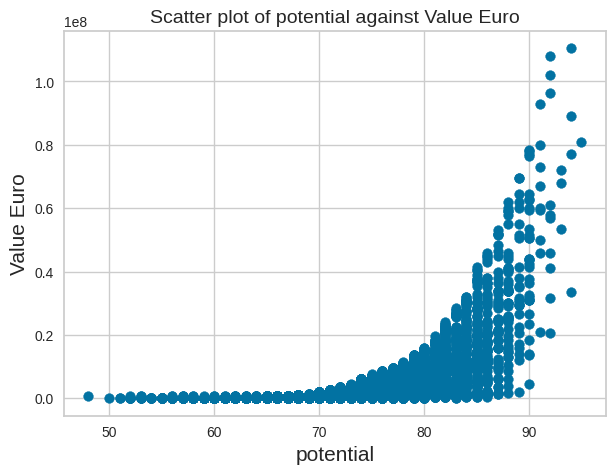

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


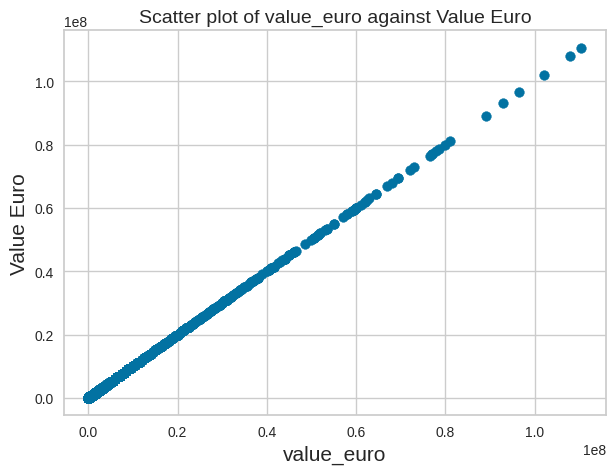

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


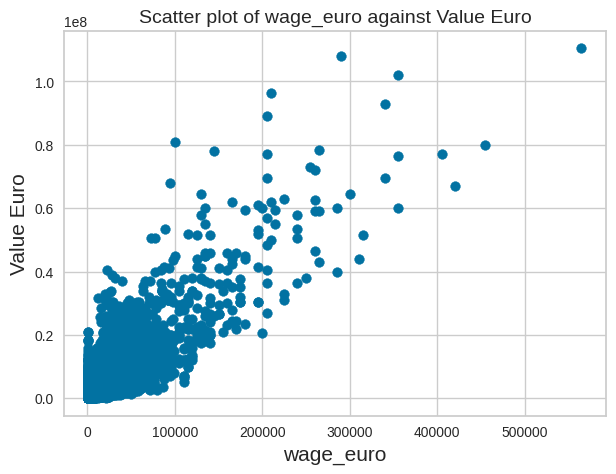

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


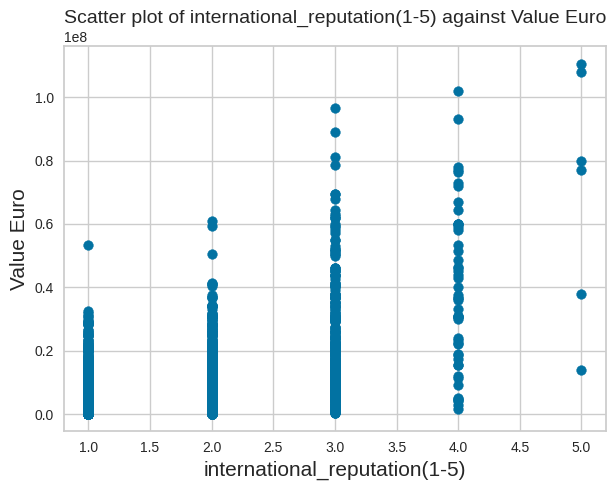

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


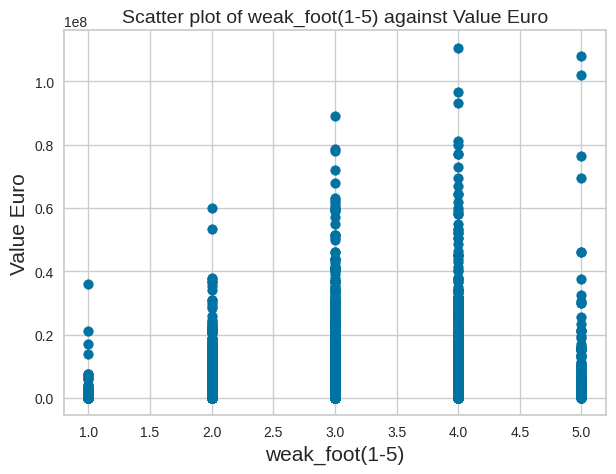

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


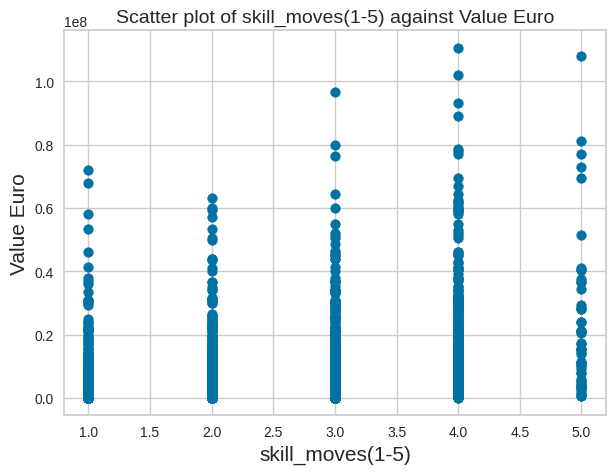

Skipping column body_type as it does not contain scalar values.
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


<Figure size 700x500 with 0 Axes>

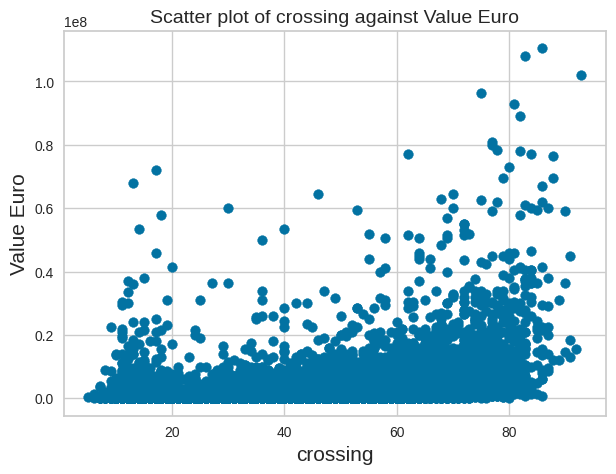

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


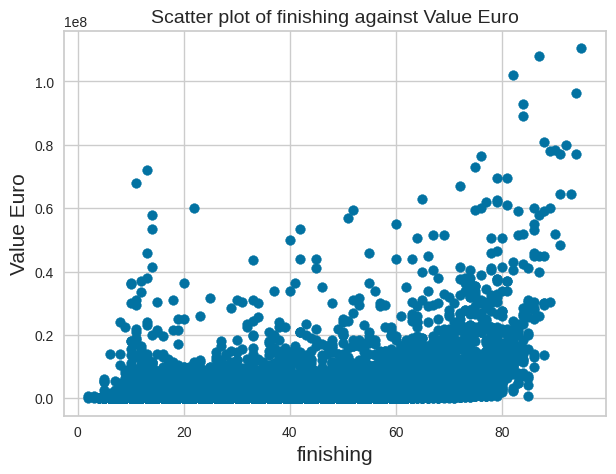

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


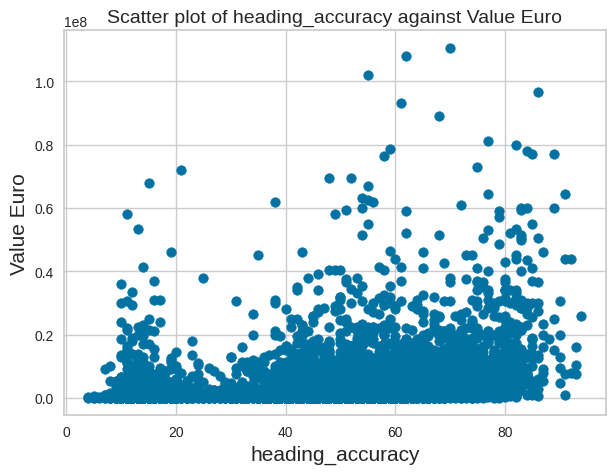

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


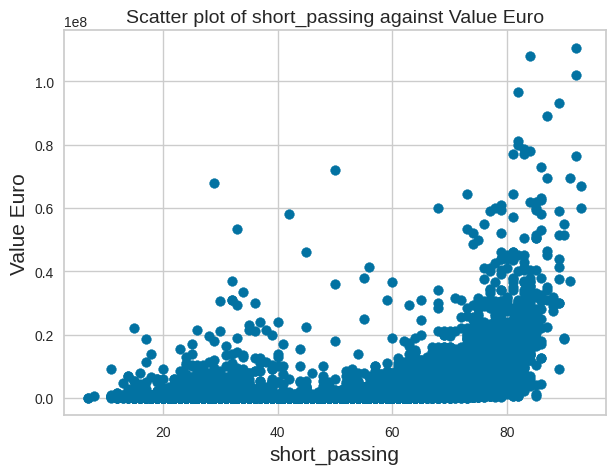

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


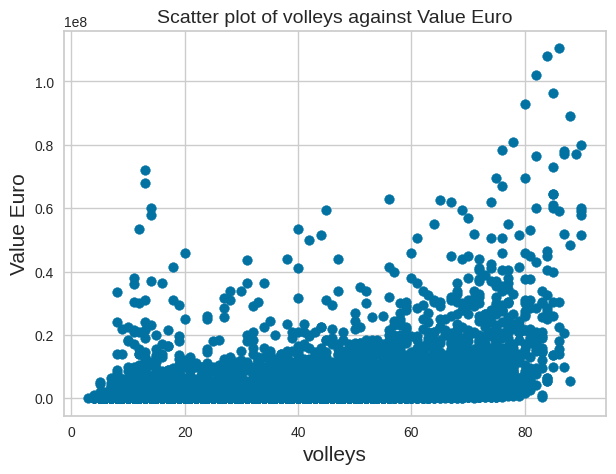

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


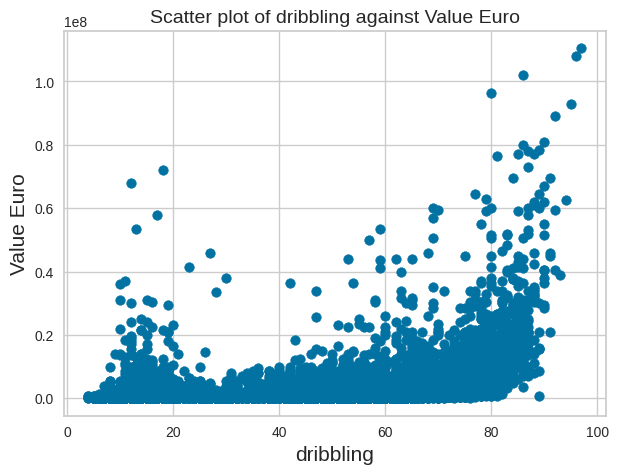

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


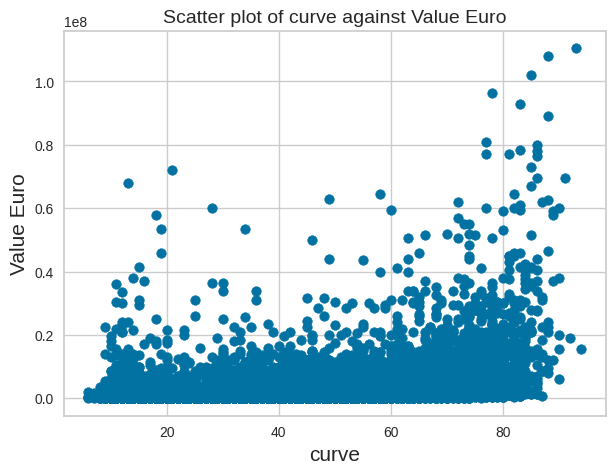

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


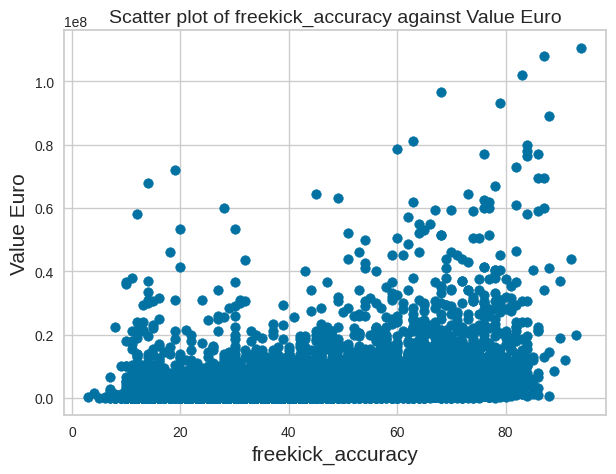

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


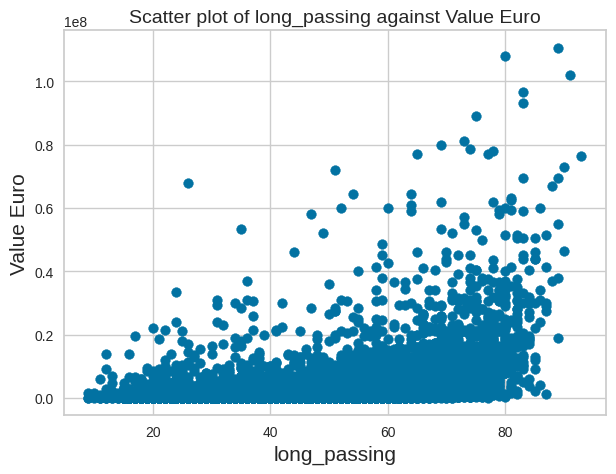

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


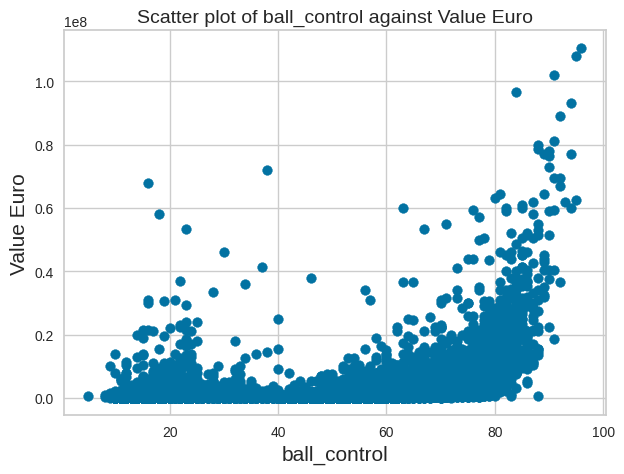

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


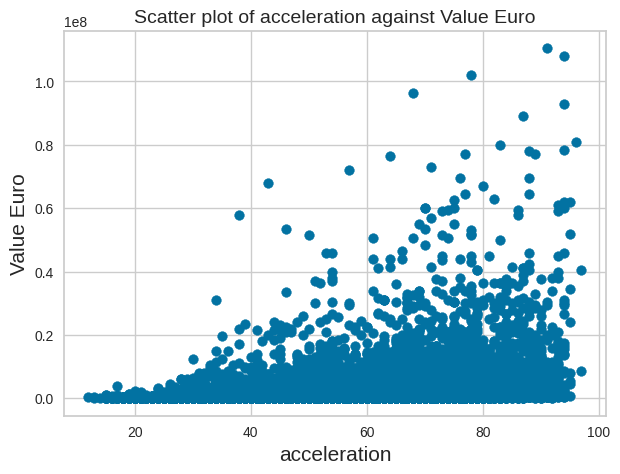

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


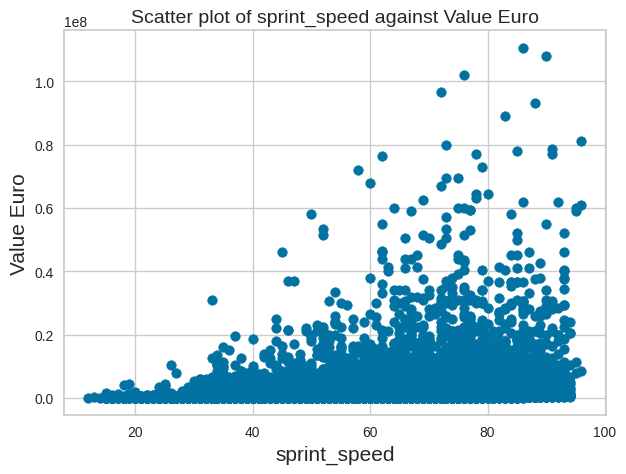

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


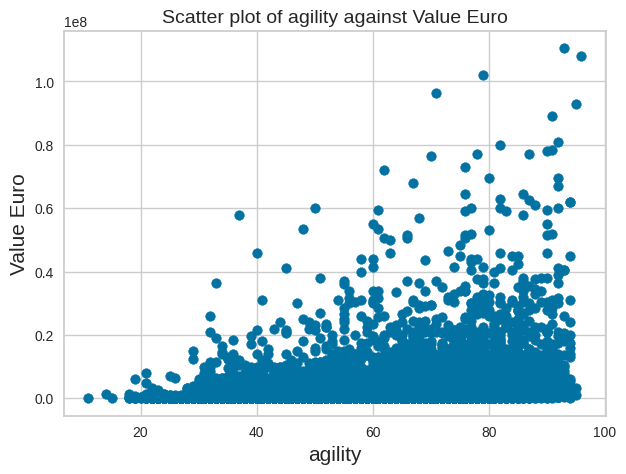

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


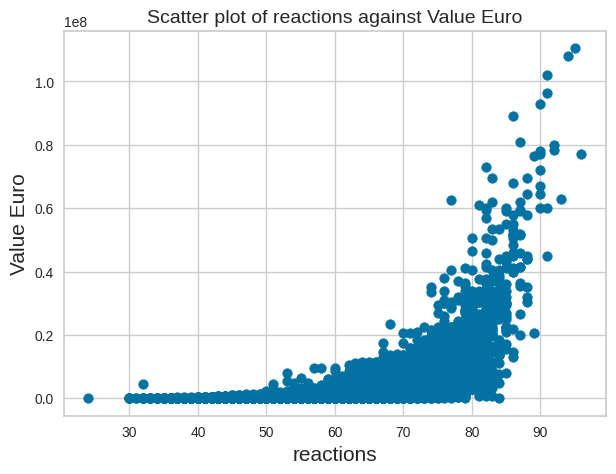

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


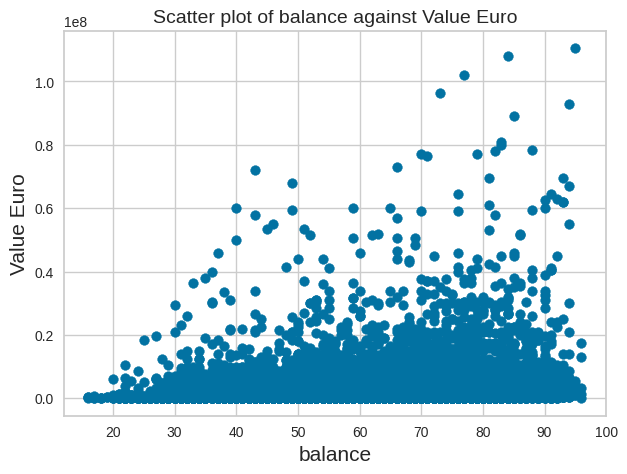

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


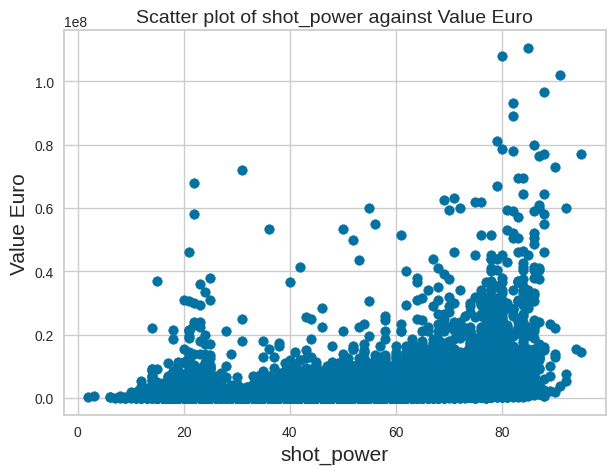

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


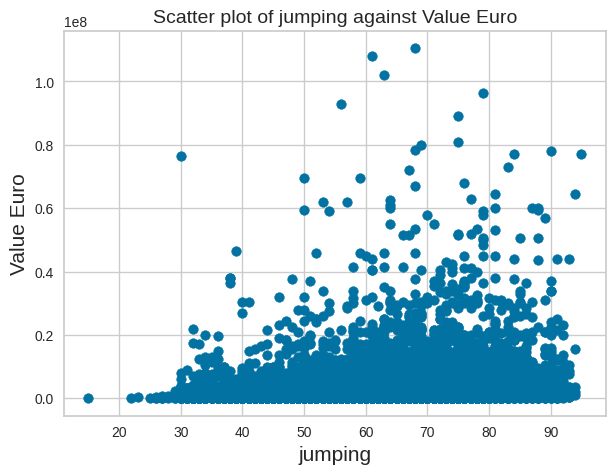

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


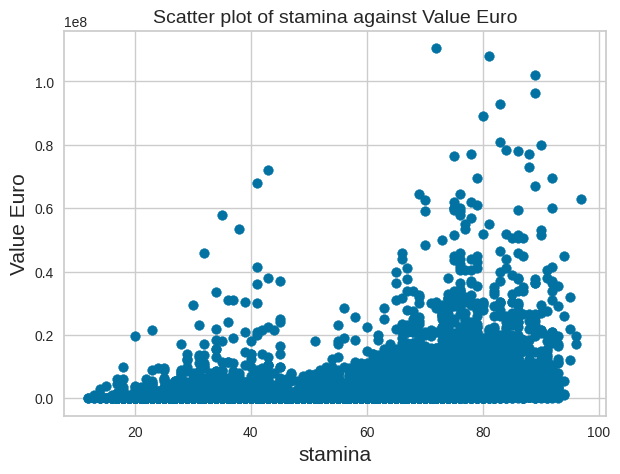

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


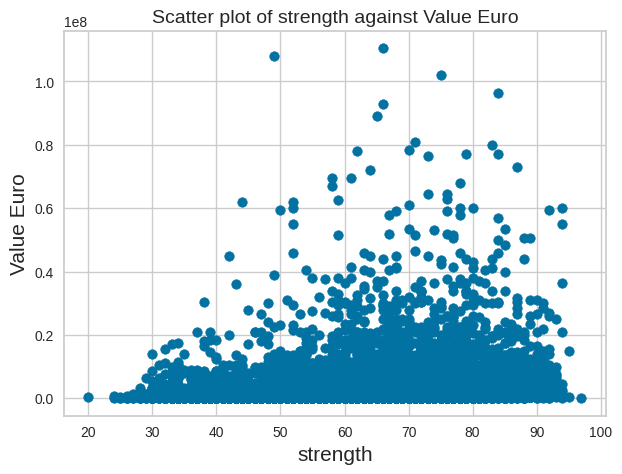

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


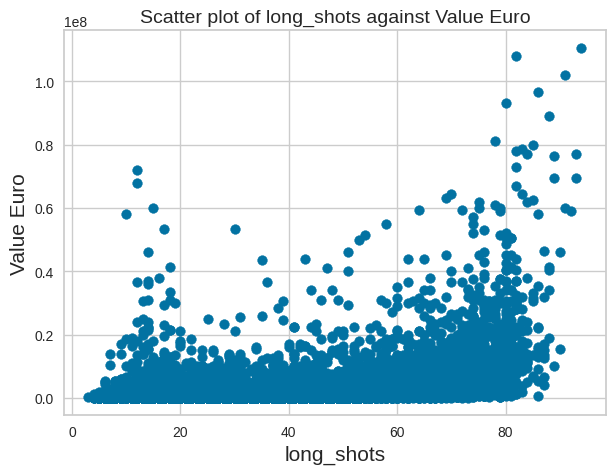

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


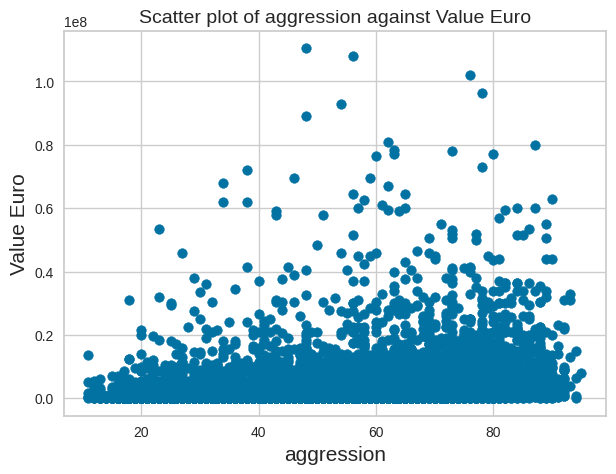

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


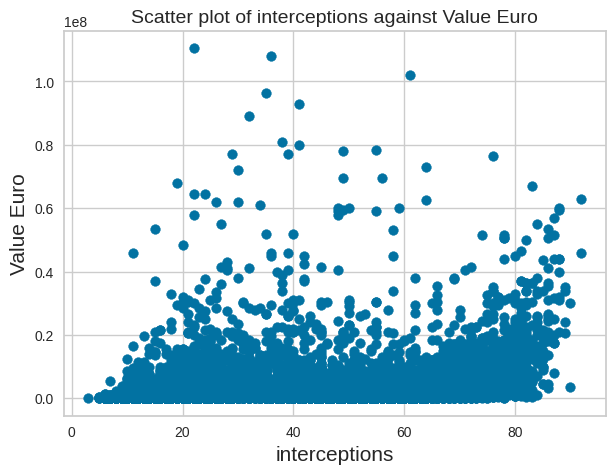

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


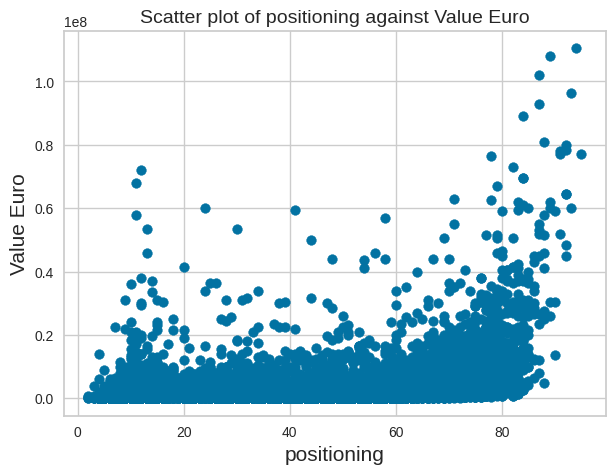

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


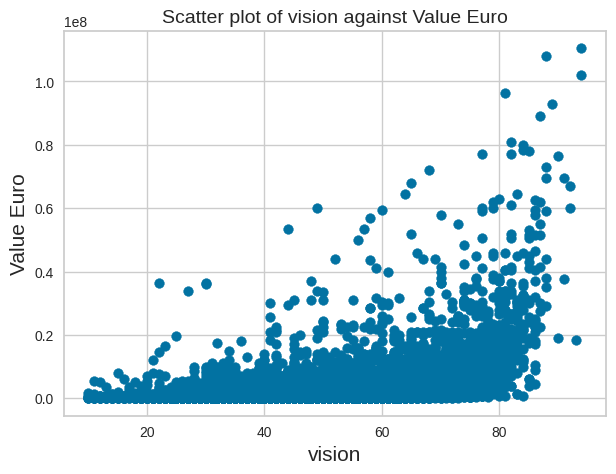

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


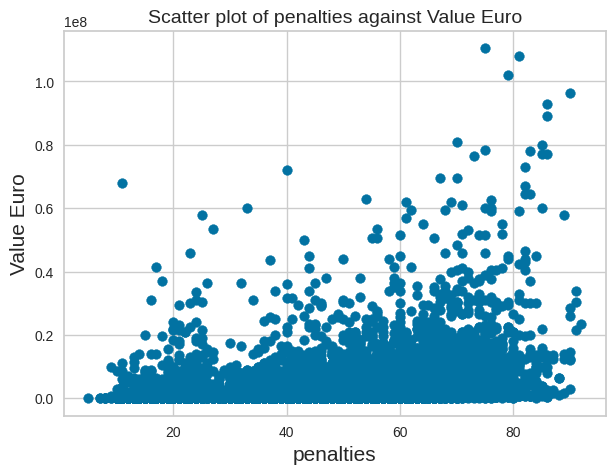

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


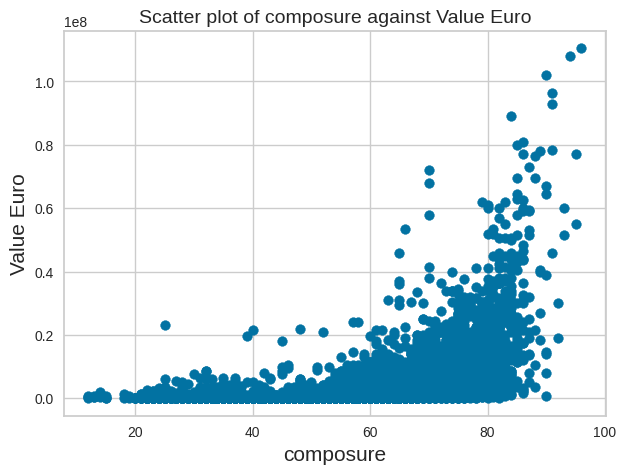

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


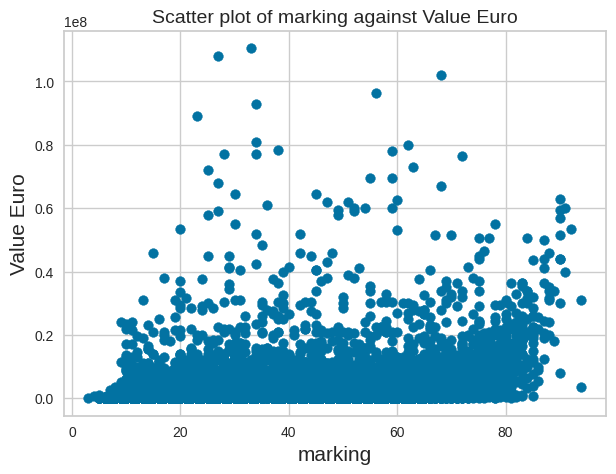

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


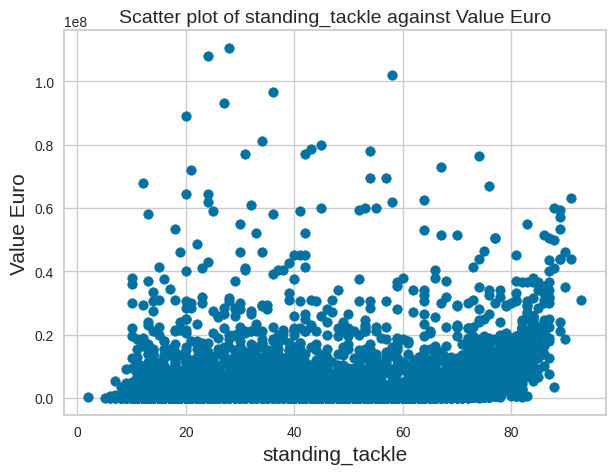

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


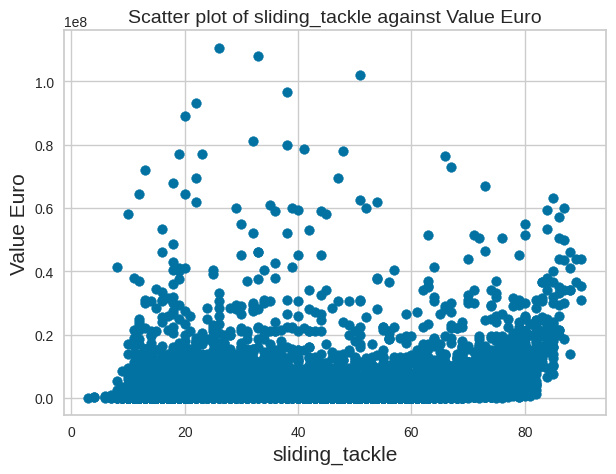

In [115]:
for i in data.columns[:]:
    plt.figure(figsize=(7, 5))

    # Check if the data type of the column is scalar or convertible to float
    if data[i].dtype.kind in 'biufc' and data['value_euro'].dtype.kind in 'biufc':
        # Convert the column values to float if necessary
        x_values = data[i].as_data_frame().astype(float)
        y_values = data['value_euro'].as_data_frame().astype(float)

        plt.scatter(x_values, y_values)
        plt.xlabel(i, fontsize=15)
        plt.ylabel("Value Euro", fontsize=15)  # Update ylabel to reflect the actual variable being plotted
        plt.title("Scatter plot of {} against Value Euro".format(i), fontsize=14)  # Update title
        plt.grid(True)
        plt.show()
    else:
        print("Skipping column {} as it does not contain scalar values.".format(i))


In [116]:
# Feature Engineering
data['age_to_potential_ratio'] = data['age'] / data['potential']
data['age_to_stamina_ratio'] = data['age'] / data['stamina']
data['performance_index'] = (data['overall_rating'] + data['potential'] + data['composure'] + data['aggression'] + data['vision']) / 5

# Skill attributes for Weighted Skill Score
skills = ['dribbling', 'finishing', 'crossing', 'ball_control', 'long_shots', 'short_passing', 'volleys', 'curve', 'freekick_accuracy', 'long_passing']
mean_skills = data[skills].mean(na_rm=True)

# Calculate the average of the mean values
average_mean_skill = sum(mean_skills) / len(mean_skills)

# Assign the average mean value to the new column 'weighted_skill_score'
data['weighted_skill_score'] = average_mean_skill

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:3042: H2ODeprecationWarning: Parameter na_rm is deprecated; use skipna instead
  warnings.warn("Parameter na_rm is deprecated; use skipna instead", category=H2ODeprecationWarning)


In [117]:
data.head()

age    height_cm    weight_kgs  positions    nationality      overall_rating    potential    value_euro    wage_euro    international_reputation(1-5)    weak_foot(1-5)    skill_moves(1-5)  body_type      crossing    finishing    heading_accuracy    short_passing    volleys    dribbling    curve    freekick_accuracy    long_passing    ball_control    acceleration    sprint_speed    agility    reactions    balance    shot_power    jumping    stamina    strength    long_shots    aggression    interceptions    positioning    vision    penalties    composure    marking    standing_tackle    sliding_tackle    age_to_potential_ratio    age_to_stamina_ratio    performance_index    weighted_skill_score
-----  -----------  ------------  -----------  -------------  ----------------  -----------  ------------  -----------  -------------------------------  ----------------  ------------------  -----------  ----------  -----------  ------------------  ---------------  ---------  -----------  -------  -------------------  --------------  --------------  --------------  --------------  ---------  -----------  ---------  ------------  ---------  ---------  ----------  ------------  ------------  ---------------  -------------  --------  -----------  -----------  ---------  -----------------  ----------------  ------------------------  ----------------------  -------------------  ----------------------
   31       170.18          72.1  CF,RW,ST     Argentina                    94           94     1.105e+08       565000                                5                 4                   4  Fat_15%              86           95                  70               92         86           97       93                   94              89              96              91              86         93           95         95            85         68         72          66            94            48               22             94        94           75           96         33                 28                26                  0.329787                0.430556                 85.2                 49.9189
   27       154.94          76.2  CAM,RM,CM    Denmark                      88           89     6.95e+07        205000                                3                 5                   4  Fat_8%               88           81                  52               91         80           84       86                   87              89              91              76              73         80           88         81            84         50         92          58            89            46               56             84        91           67           88         59                 57                22                  0.303371                0.293478                 80.4                 49.9189
   25       190.5           83.9  CM,CAM       France                       88           91     7.3e+07         255000                                4                 4                   5  Fat_15%              80           75                  75               86         85           87       85                   82              90              90              71              79         76           82         66            90         83         88          87            82            78               64             82        88           82           87         63                 67                67                  0.274725                0.284091                 86.4                 49.9189
   27       162.56          59    LW,ST        Italy                        88           88     6.2e+07         165000                                3                 4                   4  Fat_15%              86           77                  56               85         74           90       87                   77              78              93              94              86         94           83         93            75         53         75          44            

In [118]:

show_data=data[['age', 'overall_rating', 'potential','value_euro','wage_euro','international_reputation(1-5)',
            'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio','age_to_stamina_ratio',
            'performance_index', 'weighted_skill_score']]


In [119]:
columns = list(show_data.columns)
print(columns)

['age', 'overall_rating', 'potential', 'value_euro', 'wage_euro', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio', 'age_to_stamina_ratio', 'performance_index', 'weighted_skill_score']


In [120]:
show_data.describe()

Rows:17954
Cols:12

age                 overall_rating     potential          value_euro          wage_euro           international_reputation(1-5)    weak_foot(1-5)      skill_moves(1-5)    age_to_potential_ratio    age_to_stamina_ratio    performance_index    weighted_skill_score
-------  ------------------  -----------------  -----------------  ------------------  ------------------  -------------------------------  ------------------  ------------------  ------------------------  ----------------------  -------------------  ----------------------
type     int                 int                int                int                 int                 int                              int                 int                 real                      real                    real                 real
mins     17.0                47.0               48.0               10000.0             1000.0              1.0                              1.0                 1.0                 0.19318181818181818       0.2125                  33.4                 49.918920574802264
mean     25.565445026178004  66.24016932159964  71.43093461067171  2454009.1344547174  9807.563774089333   1.111674278712264                2.9456945527459064  2.36103375292414    0.362014789730754         0.4488120889293412      61.1148156399688     49.91892057480227
maxs     46.0                94.0               95.0               110500000.0         565000.0            5.0                              5.0                 5.0                 0.9375                    3.0833333333333335      89.2                 49.918920574802264
sigma    4.705707854152863   6.963729787322413  6.131339100237621  5650404.856928989   21859.109089548856  0.3921678684017022               0.663691488290801   0.7632225947263014  0.08066824500608898       0.21896914136230425     8.560520613578385    4.347682918055948e-15
zeros    0                   0                  0                  0                   0                   0                                0                   0                   0                         0                       0                    0
missing  0                   0                  0                  0                   0                   0                                0                   0                   0                         0                       0                    0
0        31.0                94.0               94.0               110500000.0         565000.0            5.0                              4.0                 4.0                 0.32978723404255317       0.4305555555555556      85.2                 49.918920574802264
1        27.0                88.0               89.0               69500000.0          205000.0            3.0                              5.0                 4.0                 0.30337078651685395       0.29347826086956524     80.4                 49.918920574802264
2        25.0                88.0               91.0               73000000.0          255000.0            4.0                              4.0                 5.0                 0.27472527472527475       0.2840909090909091      86.4                 49.918920574802264
3        27.0                88.0               88.0               62000000.0          165000.0            3.0                              4.0                 4.0                 0.3068181818181818        0.36                    76.0                 49.918920574802264
4        27.0                88.0               91.0               60000000.0          135000.0            3.0                              3.0                 2.0                 0.2967032967032967        0.36                    79.0                 49.918920574802264
5        27.0                88.0               90.0               59500000.0          215000.0            3.0                              3.0                 2.0                 0.3                       0.36                    81.4                 49.918920574802264

**This table shows summary statistics for a dataset with 17594 observations and 12 variables.**

* The variables are: age,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),age_to_potential_ratio,age_to_stamina_ratio,performance_index,weighted_skill_score.

* The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

* The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

* The "min" and "max" rows show the smallest and largest values observed for each variable.

* The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

* These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


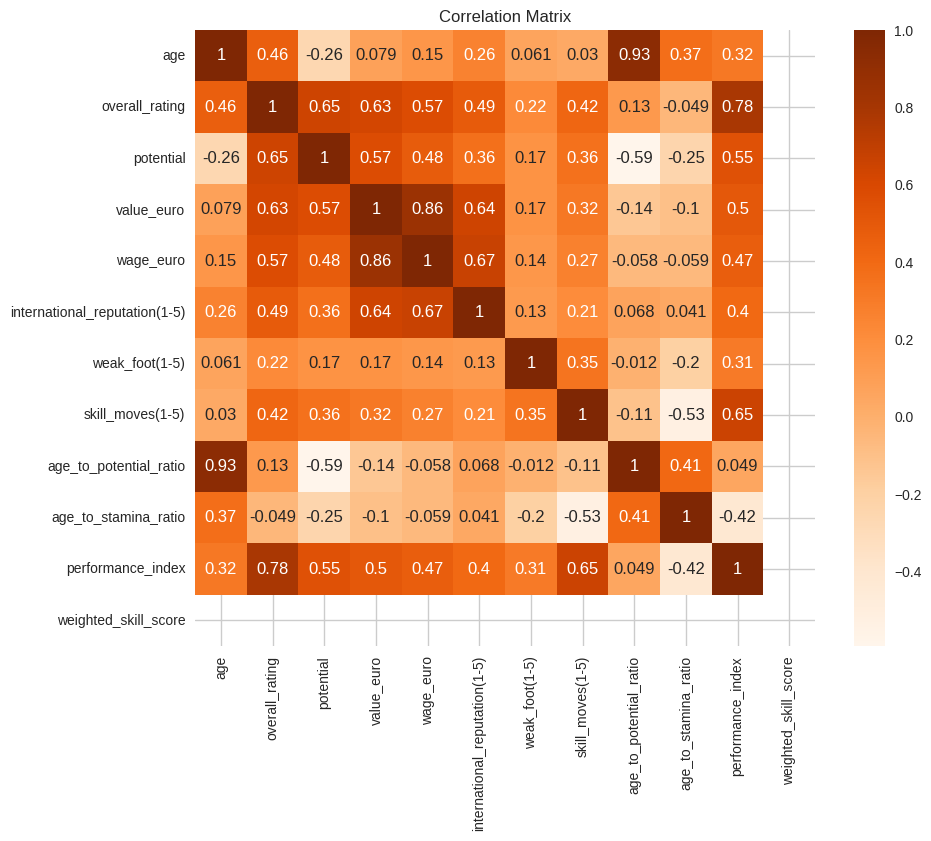

In [121]:
# import seaborn as sns
# sns.heatmap(
#     data.corr(), annot=True, cmap="Oranges"
# )  # Heatmap showing correlation between the attributes.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert H2OFrame to pandas DataFrame
data_pd = show_data.as_data_frame()

# Calculate correlation matrix
corr_matrix = data_pd.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Oranges")
plt.title("Correlation Matrix")
plt.show()

### Correlation Analysis

* Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

* We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

* The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

* A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

**From the Above Matrix we can conclude a few things**

Age and Age_to_potential_ratio is highly correlated
overall_rating and performance_index is highly correlated

In [123]:
# the independent variables set
X = data[['age', 'overall_rating', 'potential','value_euro','wage_euro','international_reputation(1-5)',
            'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio','age_to_stamina_ratio',
            'performance_index', 'weighted_skill_score']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Convert H2OFrame to pandas DataFrame
X_pd = X.as_data_frame()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_pd.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_pd.values, i)
                   for i in range(len(X_pd.columns))]

print(vif_data)


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
                          feature          VIF
0                             age   102.895263
1                  overall_rating     9.660056
2                       potential    20.026681
3                      value_euro     5.226133
4                       wage_euro     4.193828
5   international_reputation(1-5)     2.165177
6                  weak_foot(1-5)     1.152367
7                skill_moves(1-5)     2.104037
8          age_to_potential_ratio   126.497275
9            age_to_stamina_ratio     2.485693
10              performance_index     5.389502
11           weighted_skill_score  2761.729688


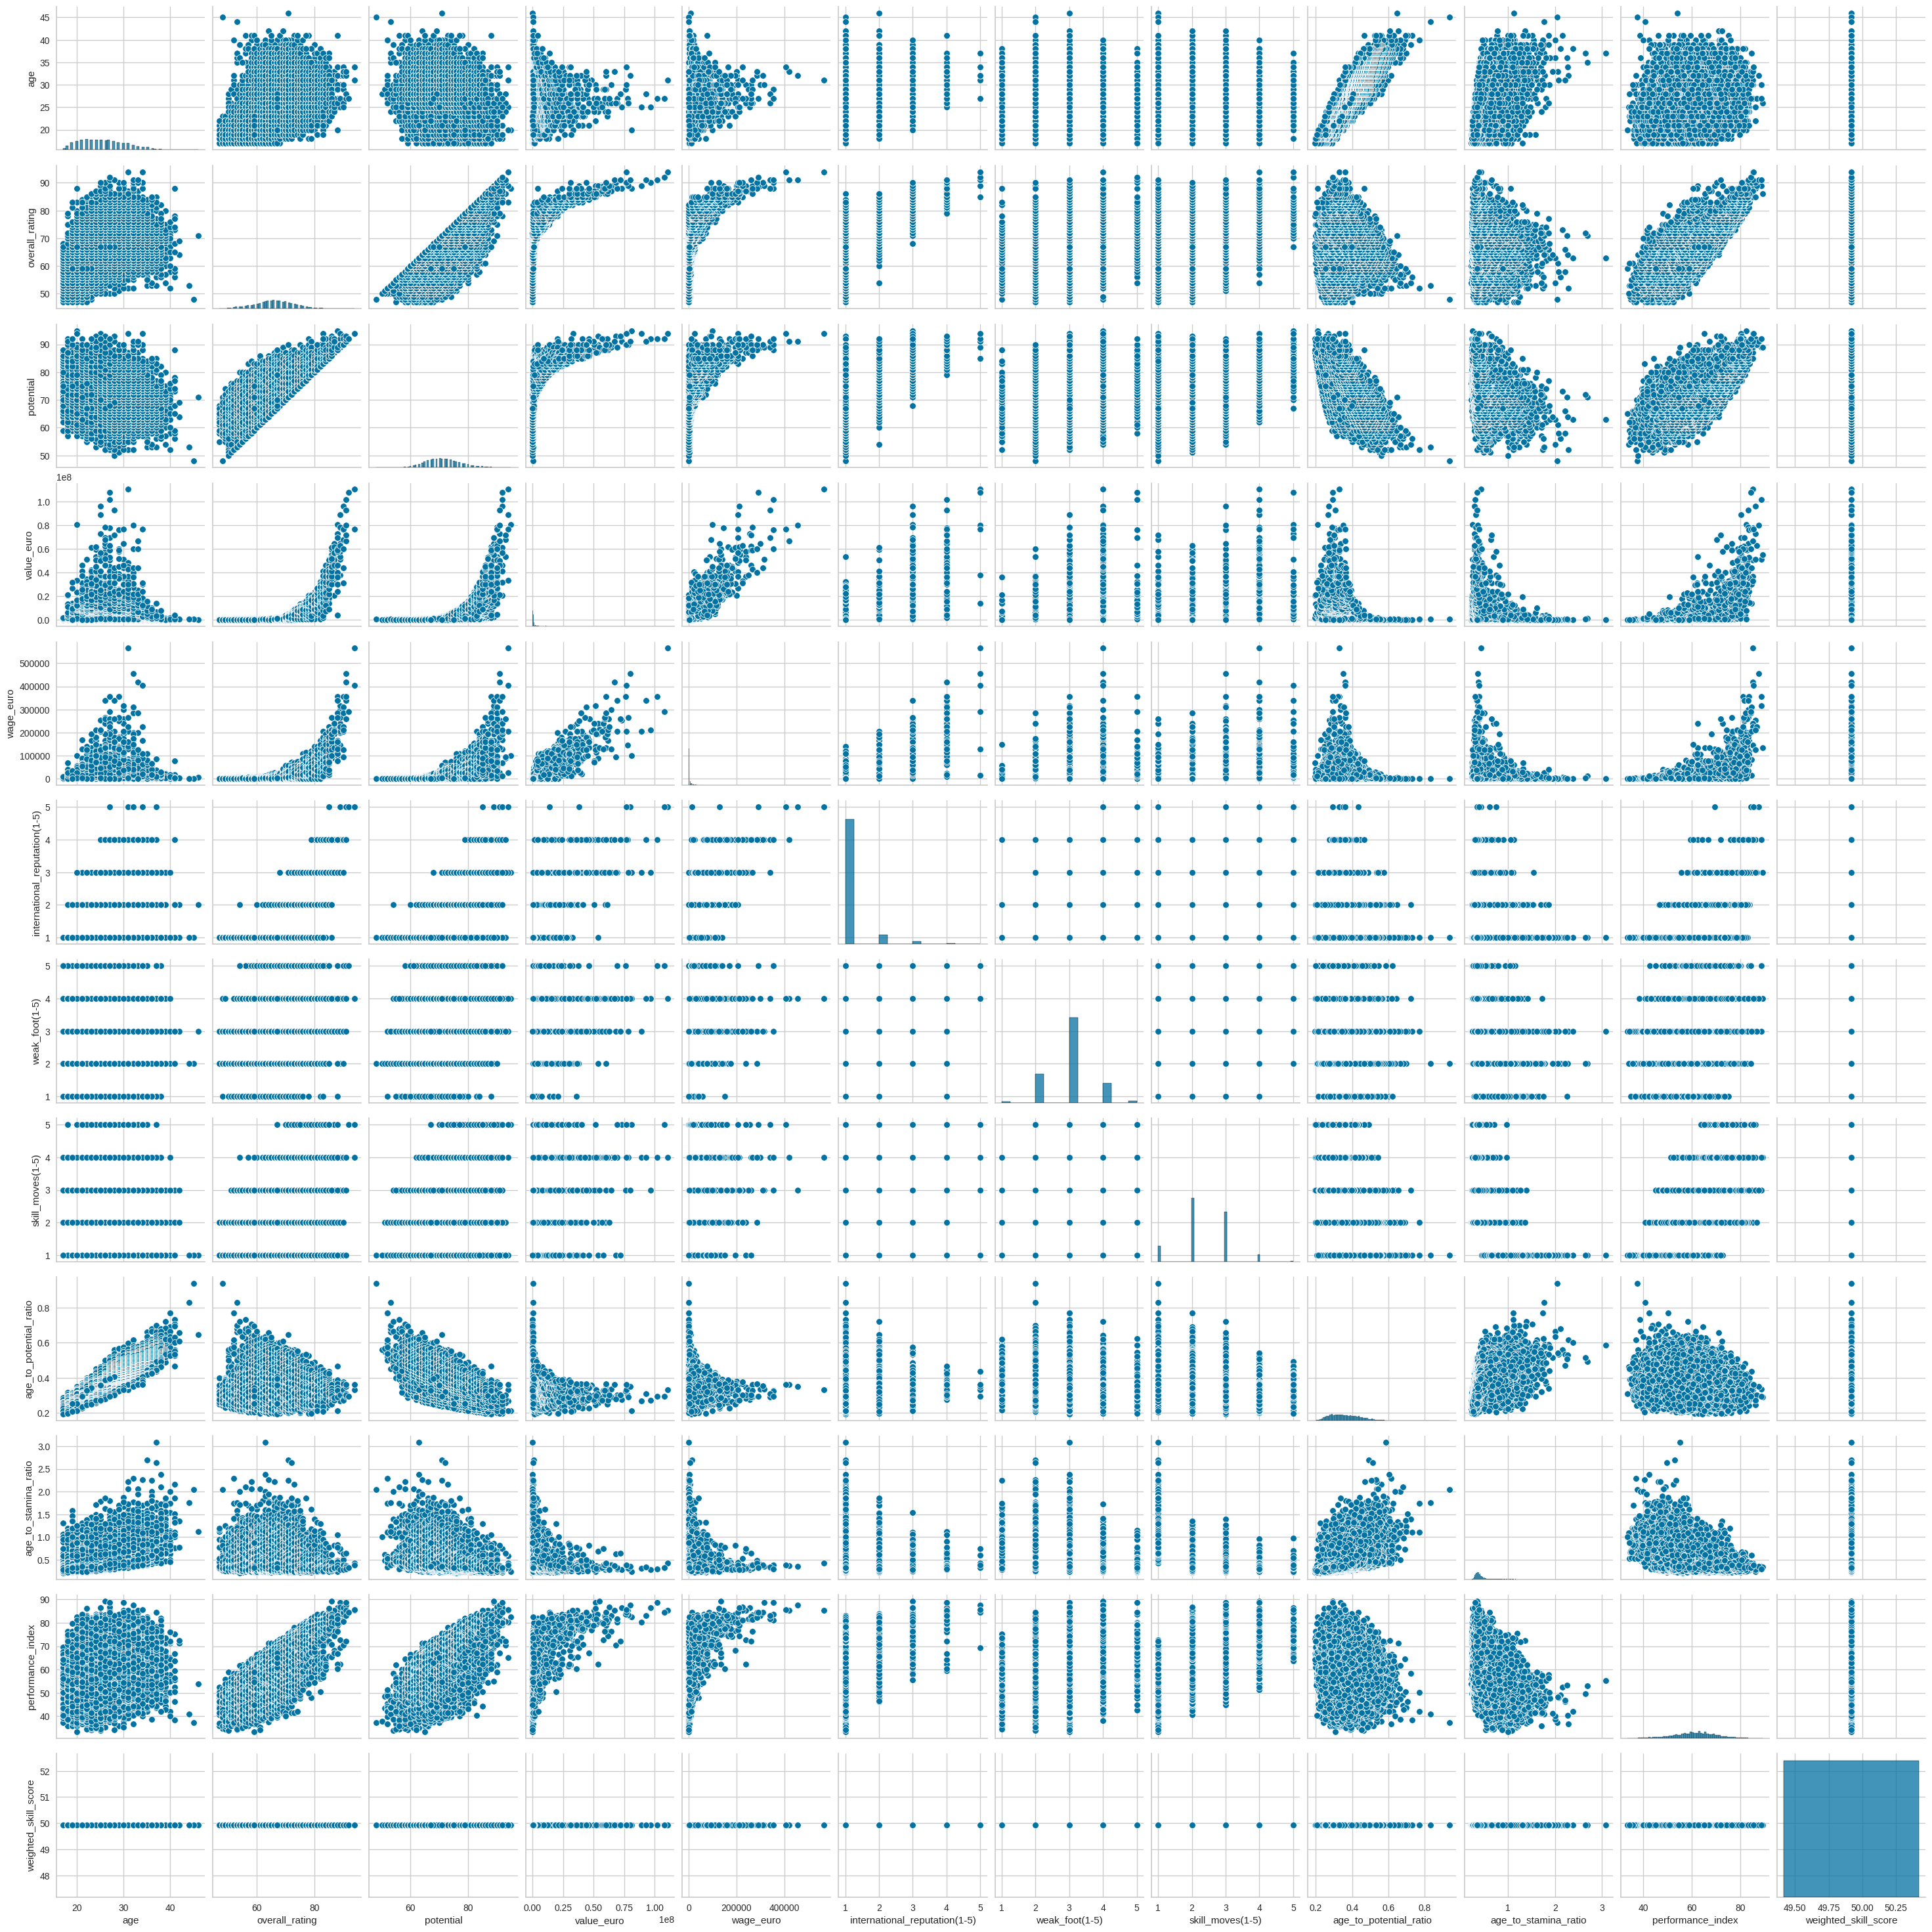

In [124]:
sns.pairplot(
    data_pd
)

**Interpreting PairPlot**

* A pair plot is a graphical representation of pairwise relationships between variables in a dataset. It displays scatter plots for each pair of variables

* Relationship between variables: The scatter plots show the relationship between pairs of variables. If two variables are highly correlated, the scatter plot will show a strong linear relationship between them. If there is no correlation between the variables, the scatter plot will show a random distribution of points. The pair plot can help identify variables that have a strong positive or negative correlation.

* Distribution of variables: The histograms show the distribution of each variable. If a variable has a normal distribution, the histogram will be bell-shaped. If a variable is skewed, the histogram will be asymmetric. The pair plot can help identify variables that have non-normal distributions or outliers.

* Outliers: The scatter plots can reveal any outliers that may exist in the dataset. Outliers are data points that are far from the other data points and can have a significant impact on statistical models.

* Patterns and trends: By examining the scatter plots, you can identify patterns and trends in the data. For example, you may see that the relationship between two variables changes over time, or that there is a nonlinear relationship between two variables.

* Potential predictors: By examining the scatter plots, you can identify variables that may be potential predictors for a statistical model. Variables that have a strong correlation with the target variable may be good predictors for the model.

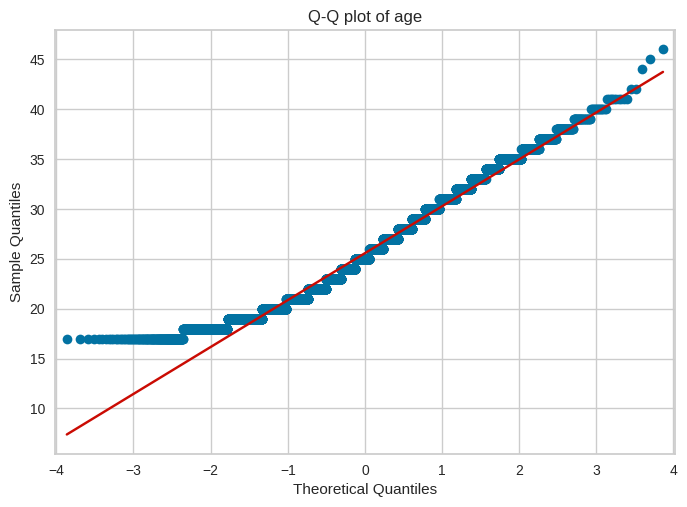

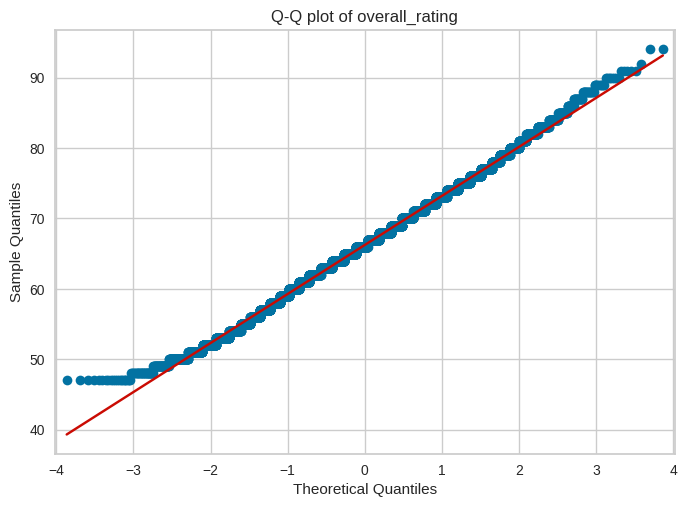

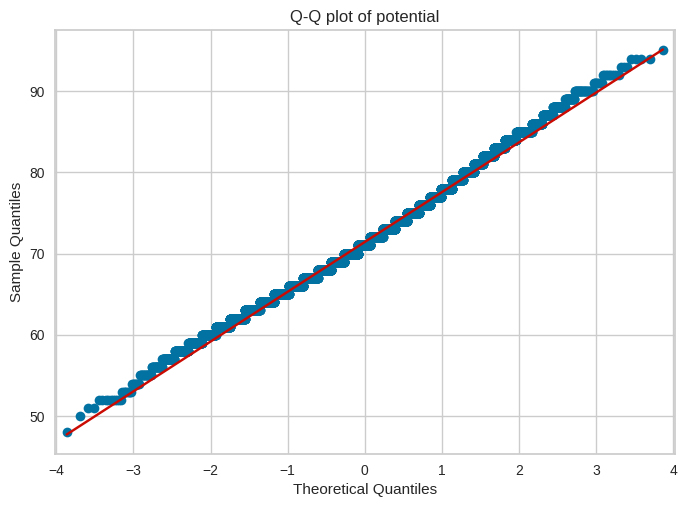

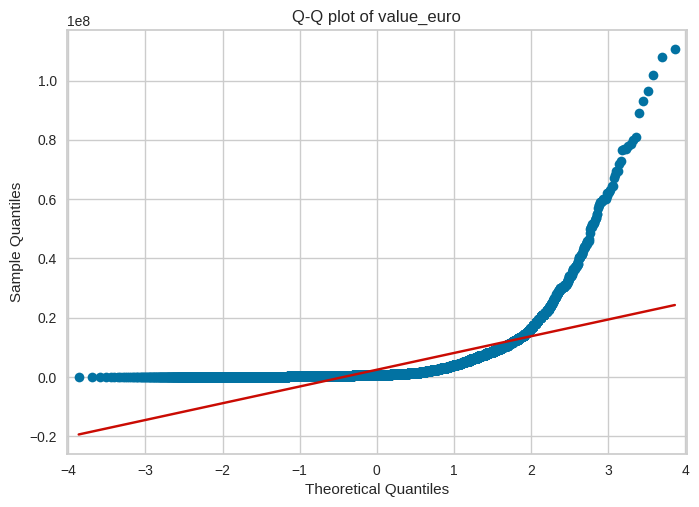

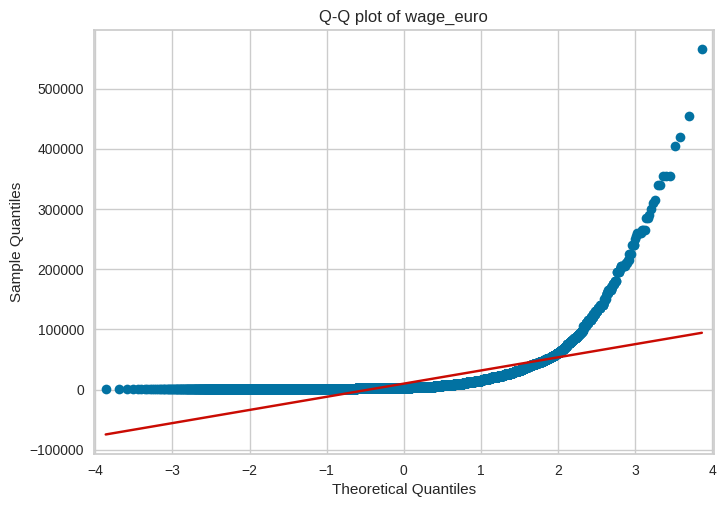

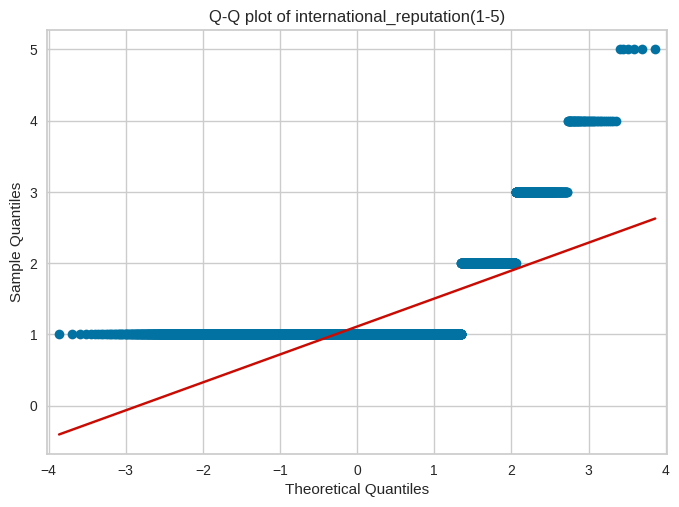

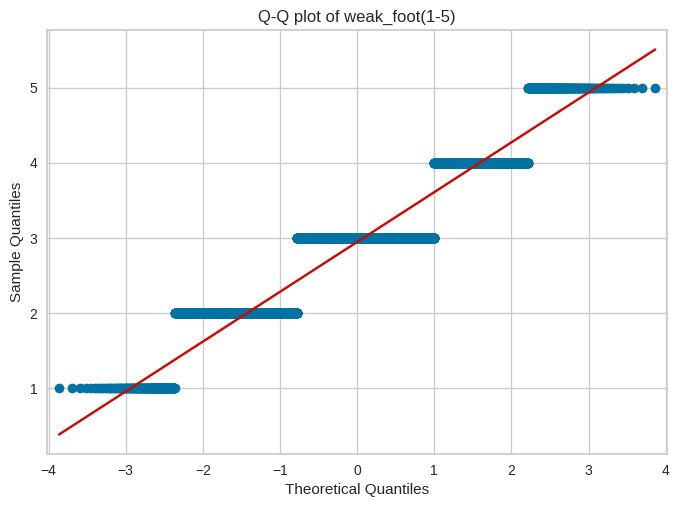

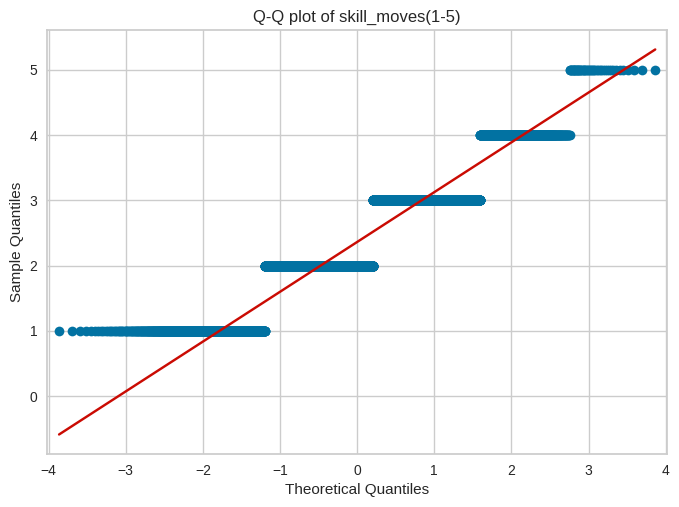

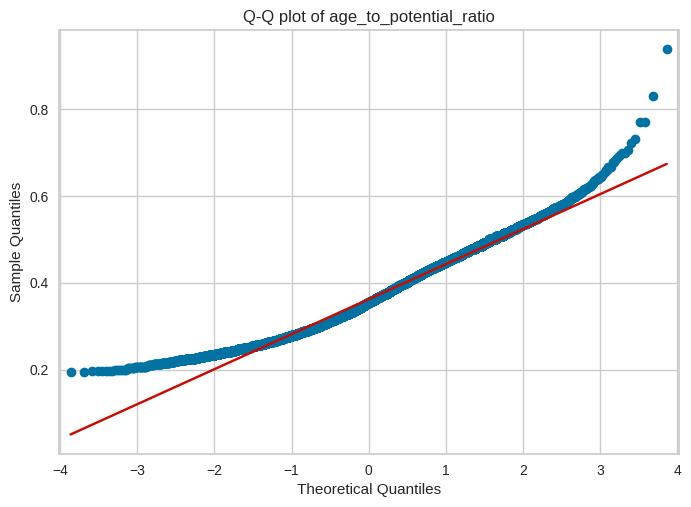

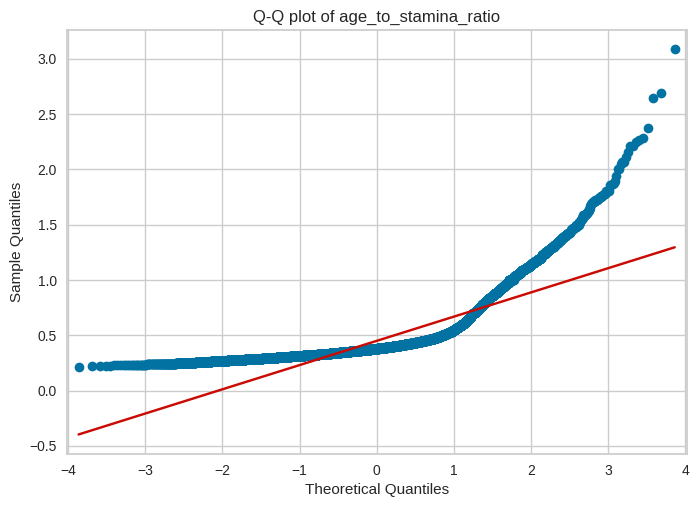

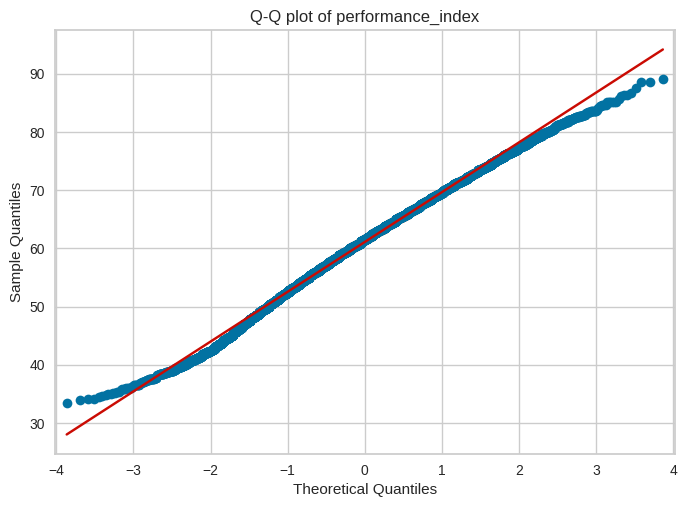

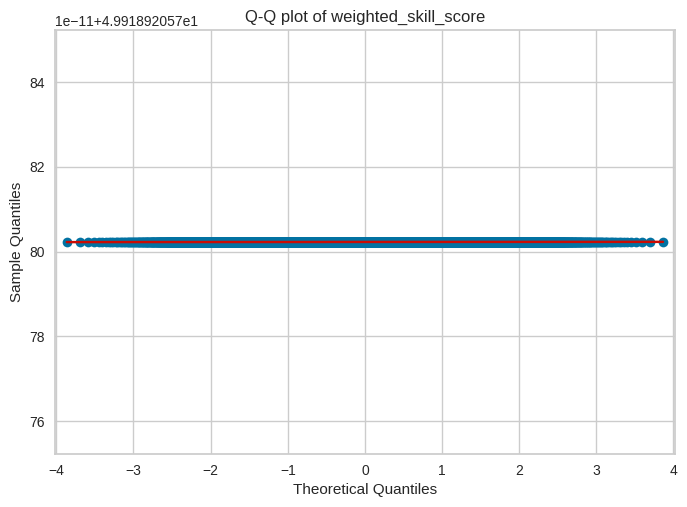

In [125]:
import statsmodels.api as sm
for col in data_pd.columns:
    sm.qqplot(data_pd[col], line='s')
    plt.title('Q-Q plot of ' + col)
    plt.show()

1 - Age : The distribution of age appears to be skewed to the left.

2 - Overall_rating : The distribution of overall_rating is positively skewed

3 - Potential : The distribution of potential appears to be normally distributed

4 - Value_euro : The distribution of residual sugar is positively skewed towards right.

5 - wage_euro : The distribution of chlorides appears to be skewed to the right

6 - Age_to_potential_ratio : The distribution of age_to_potential_ratio appears to be psotiviely positively skewed

7 - Age_to_stamina_ratio : The distribution of Age_to_stamina_ratio in appears to be positively skewed

8 - Perfomance Index : The distribution of Performance_index  is normally distributed


In [126]:
data_df = h2o.H2OFrame(
    data_pd
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [127]:
data_df.shape

(17954, 12)

In [128]:
# Create a 80/20 train/test split
split_rows=0.80
data_train, data_test = data_df.split_frame([split_rows])

In [129]:
print(data_train.shape)
print(data_test.shape)

(14297, 12)
(3657, 12)


In [130]:
#Display all columns in X
X=data_df.columns
print(X)

['age', 'overall_rating', 'potential', 'value_euro', 'wage_euro', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio', 'age_to_stamina_ratio', 'performance_index', 'weighted_skill_score']


In [131]:
y ='value_euro'
X.remove(y)
print(X)

['age', 'overall_rating', 'potential', 'wage_euro', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio', 'age_to_stamina_ratio', 'performance_index', 'weighted_skill_score']


In [132]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [133]:
#pass the data through H20AutoML
aml.train(x=X,y=y,training_frame=data_train)

AutoML progress: |
00:53:20.381: _train param, Dropping bad and constant columns: [weighted_skill_score]

██████████████
00:54:09.311: _train param, Dropping bad and constant columns: [weighted_skill_score]

█
00:54:11.260: _train param, Dropping bad and constant columns: [weighted_skill_score]

█████████████
00:54:57.137: _train param, Dropping unused columns: [weighted_skill_score]


00:54:59.83: _train param, Dropping bad and constant columns: [weighted_skill_score]

████
00:55:13.166: _train param, Dropping bad and constant columns: [weighted_skill_score]

█████
00:55:31.513: _train param, Dropping bad and constant columns: [weighted_skill_score]

████
00:55:45.784: _train param, Dropping bad and constant columns: [weighted_skill_score]

████
00:56:00.306: _train param, Dropping bad and constant columns: [weighted_skill_score]

█████
00:56:18.601: _train param, Dropping unused columns: [weighted_skill_score]


00:56:19.293: _train param, Dropping unused columns: [weighted_skill_sco

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_05320


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 114725526755.82164
RMSE: 338711.56867727684
MAE: 129086.8918846568
RMSLE: NaN
Mean Residual Deviance: 114725526755.82164
R^2: 0.9967320227334479
Null degrees of freedom: 10045
Residual degrees of freedom: 10042
Null deviance: 3.526939894727616e+17
Residual deviance: 1152532641788984.2
AIC: 284348.8240818453

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 577948339366.6854
RMSE: 760229.1360942998
MAE: 222954.779791133
RMSLE: NaN
Mean Residual Deviance: 577948339366.6854
R^2: 0.9819224016253408
Null degrees of freedom: 14296
Residual degrees of freedom: 14293
Null deviance: 4.571377650781907e+17
Residual deviance: 8262927407925501.0
AIC: 427785.2097916179

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     223794       10088.5      217943        223800        235852        210485        230891
mean_residual_deviance  5.74696e+11  1.53008e+11  7.56815e+11   6.23584e+11   6.55113e+11   4.58546e+11   3.79424e+11
mse                     5.74696e+11  1.53008e+11  7.56815e+11   6.23584e+11   6.55113e+11   4.58546e+11   3.79424e+11
null_deviance           9.14276e+16  2.10438e+16  1.24601e+17   8.68724e+16   9.72748e+16   7.08801e+16   7.75091e+16
r2                      0.982025     0.00278131   0.982422      0.979349      0.980321      0.981487      0.986545
residual_deviance       1.65012e+15  4.65471e+14  2.19022e+15   1.79343e+15   1.91424e+15   1.31007e+15   1.04266e+15
rmse                    752430       103354       869951        789674        809391        677160        615974
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

## Understanding the Parameters

Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.


Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.


Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.


Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.


Mean Residual Deviance: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.


R-squared (R^2): The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.


Null Degrees of Freedom: The Null Degrees of Freedom is the number of observations in the dataset minus 1. It represents the number of observations in the dataset that are free to vary, given the number of parameters in the model.


Residual Degrees of Freedom: The Residual Degrees of Freedom is the number of observations in the dataset minus the number of parameters in the model. It represents the number of observations in the dataset that are free to vary after taking into account the number of parameters in the model.


Null Deviance: The Null Deviance is the deviance of the null model, which is the model with no independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.


Residual Deviance: The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.


Akaike Information Criterion (AIC): The AIC is a measure of the quality of a model that takes into account the complexity of the model. It is calculated as the negative log-likelihood of the model plus twice the number of parameters in the model. The AIC can be used to compare the quality of different models, with lower values indicating better quality.

In [134]:
print(aml.leaderboard)

model_id                                                  rmse          mse     mae    rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_05320  760229  5.77948e+11  222955      nan               5.77948e+11
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_05320  760798  5.78814e+11  214718      nan               5.78814e+11
StackedEnsemble_AllModels_1_AutoML_1_20240220_05320     764064  5.83793e+11  213238      nan               5.83793e+11
StackedEnsemble_AllModels_2_AutoML_1_20240220_05320     765887  5.86584e+11  219281      nan               5.86584e+11
GBM_4_AutoML_1_20240220_05320                           773496  5.98296e+11  222045      nan               5.98296e+11
GBM_2_AutoML_1_20240220_05320                           810671  6.57187e+11  232597      nan               6.57187e+11
GBM_5_AutoML_1_20240220_05320                           817861  6.68897e+11  252802      nan               6.68897e+11
GBM_3_AutoML_1_20240220_05320                   

In [135]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_05320': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_05320': 1,
 'StackedEnsemble_AllModels_1_AutoML_1_20240220_05320': 2,
 'StackedEnsemble_AllModels_2_AutoML_1_20240220_05320': 3,
 'GBM_4_AutoML_1_20240220_05320': 4,
 'GLM_1_AutoML_1_20240220_05320': 19}

In [136]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

4


In [137]:
best_model.algo

'gbm'

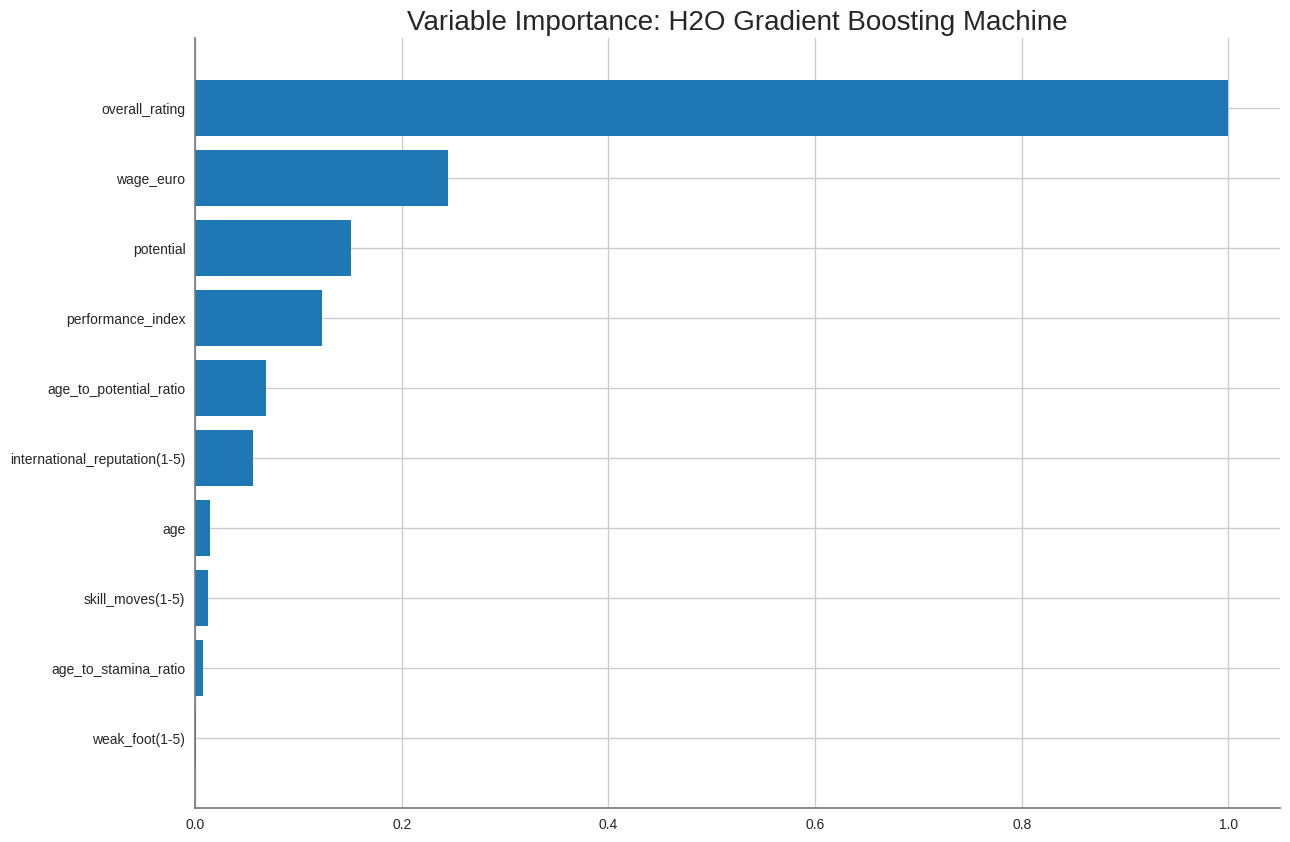

<Figure size 800x550 with 0 Axes>

In [138]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

**The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model**

We can Interpret that overall_rating is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)
Potential is 0.30 (Think as if it is 30% Important than Alcohol was)

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-139-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


19
glm


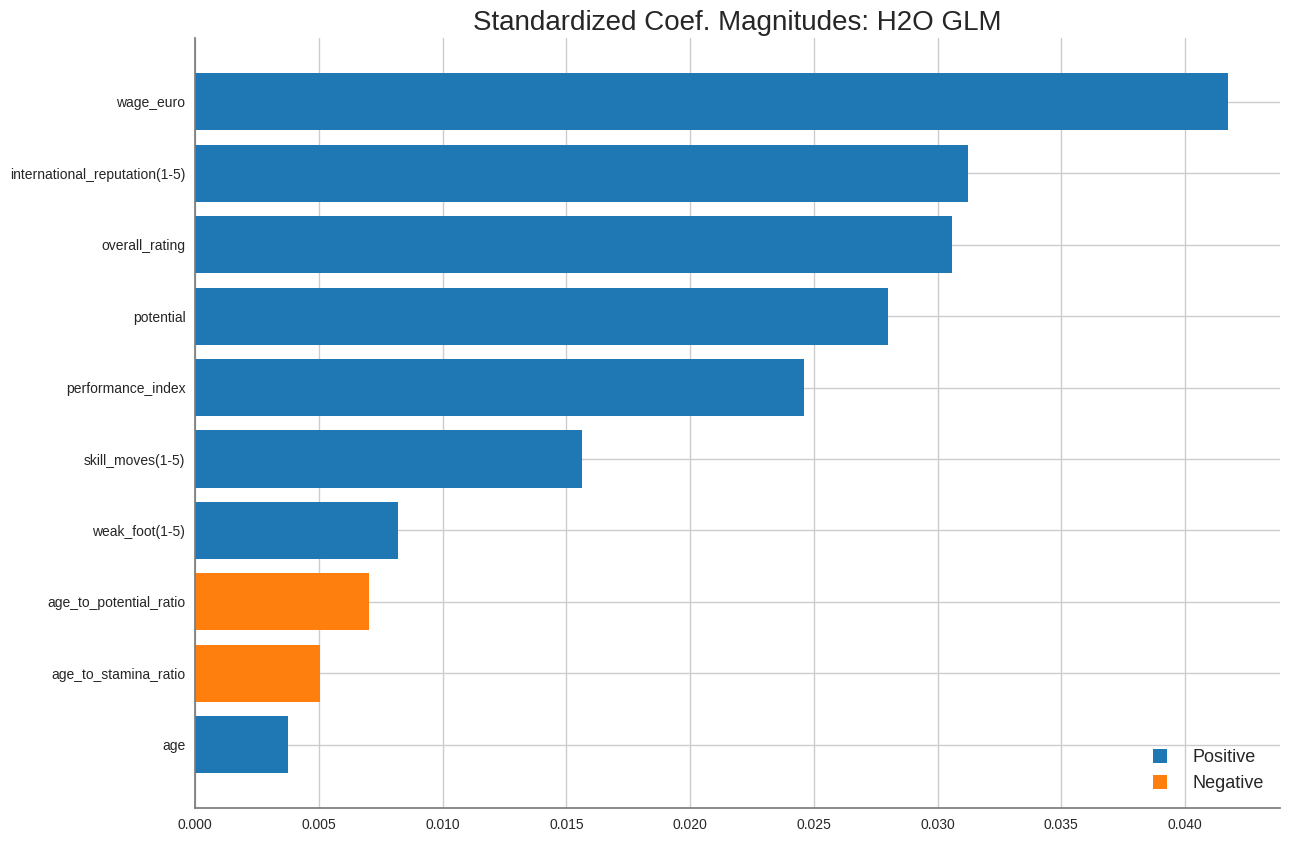

In [139]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

Standardized coefficient magnitudes (sometimes referred to as standardized coefficients or beta coefficients) are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage.

The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable. A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

In [140]:
print(best_model.rmse(train=True))

353576.6820365311


In [141]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [142]:
mod_perf = best_model.model_performance(data_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 576104128599.2533,
 'rmse': 759015.2360784685,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In the provided code snippet, the following actions are performed:

1. **Model Performance Evaluation**:
   - The `best_model` (presumably the best-performing model selected from the grid search) is evaluated using its `model_performance` method, passing the `data_test` as the argument. This method computes and returns the performance metrics of the model on the test dataset (`data_test`).
   - The resulting model performance object is assigned to the variable `mod_perf`.

2. **Model Performance Statistics Calculation**:
   - The `model_performance_stats` function (not defined in the provided snippet) is called with `mod_perf` as an argument. This function presumably calculates various statistics or metrics from the model performance object, such as accuracy, precision, recall, F1-score, etc., and returns them as a dictionary.
   - The returned dictionary containing the model performance statistics is assigned to the variable `stats_test`.

3. **Displaying Model Performance Statistics**:
   - Finally, the `stats_test` dictionary is printed to display the model performance statistics on the test dataset.

Explanation of the process:

- After training and selecting the best model using grid search, it's important to evaluate its performance on unseen data to assess its generalization ability.
- The `model_performance` method computes various performance metrics such as MSE (Mean Squared Error), RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), AUC (Area Under the Curve), etc., depending on the type of model and the task (e.g., regression, classification).
- The `model_performance_stats` function is a custom function (not provided in the snippet) that likely encapsulates the logic to extract and calculate specific statistics or metrics of interest from the model performance object.
- By displaying the model performance statistics, you can gain insights into how well the selected model performs on the test dataset and compare it with other models or baseline performance.

Overall, this code snippet demonstrates the process of evaluating the selected model's performance on a test dataset and extracting relevant statistics or metrics for further analysis or comparison.

In [143]:
predictions = best_model.predict(data_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [144]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
           predict
0     7.452138e+07
1     6.005096e+07
2     4.032652e+07
3     4.781761e+07
4     5.848356e+07
...            ...
3652  6.536512e+07
3653  7.955396e+07
3654  7.466272e+07
3655  7.553354e+07
3656  8.746725e+07

[3657 rows x 1 columns]


In [145]:
y_test = h2o.as_list(data_test[y])  # Real Answers
y_test

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


value_euro
0       73000000
1       62000000
2       38000000
3       36500000
4       64500000
...          ...
3652    44000000
3653    76500000
3654    77000000
3655    72000000
3656    77000000

[3657 rows x 1 columns]

### Regularization

In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

In [146]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

fifa_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
fifa_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
fifa_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
fifa_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

**This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.**

The first model, "wine_glm_regularization_ridge," is using Ridge regularization. The "family" argument is set to "gaussian," which means that the response variable is continuous and the model is using a normal (Gaussian) error distribution. The "alpha" argument is set to 0, which means that the model is using Ridge regularization. The "nfolds" argument is set to 5, which means that the model is using 5-fold cross-validation to evaluate the performance of the model.


The second model, "wine_glm_regularization_lasso," is using Lasso regularization. The "family" and "nfolds" arguments are the same as in the Ridge model, but the "alpha" argument is set to 1, which means that the model is using Lasso regularization.


This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.

In [147]:
fifa_glm.train(x=X, y=y, training_frame=data_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [weighted_skill_score]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708390114840_21


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              10                            10                             1                       py_791_sid_8867

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 6183751052886.125
RMSE: 2486714.911863868
MAE: 1298479.7821773845
RMSLE: NaN
Mean Residual Deviance: 6183751052886.125
R^2: 0.8065789615289016
Null degrees of freedom: 14296
Residual degrees of freedom: 14286
Null deviance: 4.5708103679903104e+17
Residual deviance: 8.840908880311293e+16
AIC: 461685.8998074406

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 6223438534261.17
RMSE: 2494682.0507353577
MAE: 1300909.5187160447
RMSLE: NaN
Mean Residual Deviance: 6223438534261.17
R^2: 0.8053375800767358
Null degrees of freedom: 14296
Residual degrees of freedom: 14286
Null deviance: 4.5710644011643776e+17
Residual deviance: 8.897650072433195e+16
AIC: 461777.3651392946

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1.30089e+06  21552.8      1.28496e+06   1.29972e+06   1.29754e+06   1.3374e+06    1.28482e+06
mean_residual_deviance  6.22917e+12  8.41609e+11  5.35037e+12   7.43291e+12   6.54798e+12   6.29658e+12   5.518e+12
mse                     6.22917e+12  8.41609e+11  5.35037e+12   7.43291e+12   6.54798e+12   6.29658e+12   5.518e+12
null_deviance           9.14213e+16  1.26203e+16  7.53807e+16   1.01453e+17   9.8412e+16    1.0165e+17    8.02112e+16
r2                      0.804695     0.0119724    0.794789      0.792869      0.811833      0.821424      0.802559
residual_deviance       1.77953e+16  2.25143e+15  1.54626e+16   2.10128e+16   1.85177e+16   1.81467e+16   1.58367e+16
rmse                    2.49133e+06  167431       2.31309e+06   2.72634e+06   2.5589e+06    2.5093e+06    2.34904e+06
rmsle                   nan          0            nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective         training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ----------------  -----------------  -------------------  ------------------  ------------------
    2024-02-20 00:57:13  0.000 sec   0             4.5708103679902554e+17     31970415947333.4
    2024-02-20 00:57:13  0.053 sec   1                                                          2486714.911863868  6183751052886.125    1298479.7821773845  0.8065789615289016

Variable Importances: 
variable                       relative_importance    scaled_importance    percentage
-----------------------------  ---------------------  -------------------  ------------
age                            8.54397e+06            1                    0.320108
age_to_potential_ratio         8.44717e+06            0.98867              0.316481
wage_euro                      3.41611e+06            0.399827             0.127988
potential                      2.57032e+06            0.300834             0.0962994
overall_rating                 2.42978e+06            0.284385             0.0910339
international_reputation(1-5)  941855                 0.110236             0.0352875
performance_index              186485                 0.0218265            0.00698686
age_to_stamina_ratio     

In [148]:
fifa_glm_regularization_ridge.train(x=X, y=y, training_frame=data_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708390114840_22


GLM Model: summary
    family    link      regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 4828.8 )  10                            10                             1                       py_791_sid_8867

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 31940302548985.824
RMSE: 5651575.227225223
MAE: 2785829.6745386515
RMSLE: 1.7696673674824228
Mean Residual Deviance: 31940302548985.824
R^2: 0.0009419144998564777
Null degrees of freedom: 14296
Residual degrees of freedom: 14286
Null deviance: 4.5708103679903104e+17
Residual deviance: 4.566505055428503e+17
AIC: 485160.76690380723

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 31950233726147.74
RMSE: 5652453.779213744
MAE: 2786523.516775676
RMSLE: 1.7700183103804923
Mean Residual Deviance: 31950233726147.74
R^2: 0.0006312780296185982
Null degrees of freedom: 14296
Residual degrees of freedom: 14286
Null deviance: 4.5713708882036064e+17
Residual deviance: 4.567924915827342e+17
AIC: 485165.2115696156

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     2.78745e+06  68406.1      2.80483e+06   2.77468e+06   2.81292e+06   2.67981e+06   2.86503e+06
mean_residual_deviance  3.19972e+13  3.51719e+12  3.22663e+13   3.34545e+13   3.14449e+13   2.65991e+13   3.62212e+13
mse                     3.19972e+13  3.51719e+12  3.22663e+13   3.34545e+13   3.14449e+13   2.65991e+13   3.62212e+13
null_deviance           9.14274e+16  8.71692e+15  9.0127e+16    9.61496e+16   9.09141e+16   7.82375e+16   1.01709e+17
r2                      0.000381835  0.000600191  0.000788785   0.00060286    0.000538034   -0.000679055  0.00065855
residual_deviance       9.13585e+16  8.71376e+15  9.00553e+16   9.60814e+16   9.08443e+16   7.81748e+16   1.01637e+17
rmse                    5.64955e+06  315839       5.68035e+06   5.78399e+06   5.60758e+06   5.15743e+06   6.0184e+06
rmsle                   1.77002      0.0196935    1.77333       1.75652       1.74423       1.78327       1.79276

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective         training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ----------------  -----------------  -------------------  ------------------  ---------------------
    2024-02-20 00:57:14  0.000 sec   0             4.5708103679902554e+17     31970415947333.4
    2024-02-20 00:57:14  0.040 sec   1                                                          5651575.227225223  31940302548985.824   2785829.6745386515  0.0009419144998564777

Variable Importances: 
variable                       relative_importance    scaled_importance    percentage
-----------------------------  ---------------------  -------------------  ------------
wage_euro                      999.447                1                    0.213291
international_reputation(1-5)  747.056                0.747469             0.159428
overall_rating                 731.78                 0.732185             0.156168
potential                      669.741                0.670111             0.142928
performance_index              588.569                0.588895             0.125606
skill_moves(1-5)               374.13                 0.374337             0.0798426
weak_foot(1-5)                 1

In [149]:
fifa_glm_regularization_lasso.train(x=X, y=y, training_frame=data_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708390114840_23


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 4828.8 )  10                            10                             1                       py_791_sid_8867

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 6198204044351.734
RMSE: 2489619.2569049057
MAE: 1278301.1520086112
RMSLE: NaN
Mean Residual Deviance: 6198204044351.734
R^2: 0.8061268876025123
Null degrees of freedom: 14296
Residual degrees of freedom: 14286
Null deviance: 4.5708103679903104e+17
Residual deviance: 8.861572322209675e+16
AIC: 461719.2765256094

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 6276851580113.555
RMSE: 2505364.560321223
MAE: 1277481.1414951822
RMSLE: NaN
Mean Residual Deviance: 6276851580113.555
R^2: 0.8036668778268691
Null degrees of freedom: 14296
Residual degrees of freedom: 14286
Null deviance: 4.5710301397834477e+17
Residual deviance: 8.974014704088349e+16
AIC: 461899.5464578369

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1.27737e+06  23059.1      1.27457e+06   1.28162e+06   1.29824e+06   1.29283e+06   1.2396e+06
mean_residual_deviance  6.27416e+12  1.15869e+12  6.20503e+12   6.74278e+12   7.83066e+12   5.93267e+12   4.65967e+12
mse                     6.27416e+12  1.15869e+12  6.20503e+12   6.74278e+12   7.83066e+12   5.93267e+12   4.65967e+12
null_deviance           9.14206e+16  1.05949e+16  9.0556e+16    9.14051e+16   1.08654e+17   8.6208e+16    8.02802e+16
r2                      0.804826     0.0177026    0.801903      0.793315      0.792207      0.801213      0.835489
residual_deviance       1.7948e+16   3.37091e+15  1.79387e+16   1.88865e+16   2.25758e+16   1.71336e+16   1.32055e+16
rmse                    2.49607e+06  234000       2.49099e+06   2.59669e+06   2.79833e+06   2.43571e+06   2.15863e+06
rmsle                   nan          0            nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective         training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ----------------  ------------------  -------------------  ------------------  ------------------
    2024-02-20 00:57:14  0.000 sec   0             4.5708103679902554e+17     31970415947333.4
    2024-02-20 00:57:14  0.025 sec   1                                                          2489619.2569049057  6198204044351.734    1278301.1520086112  0.8061268876025123

Variable Importances: 
variable                       relative_importance    scaled_importance    percentage
-----------------------------  ---------------------  -------------------  ------------
age                            7.4146e+06             1                    0.31288
age_to_potential_ratio         7.16568e+06            0.966429             0.302376
wage_euro                      3.44237e+06            0.46427              0.145261
overall_rating                 2.31213e+06            0.311834             0.0975666
potential                      2.15762e+06            0.290997             0.0910469
international_reputation(1-5)  905177                 0.12208              0.0381965
performance_index              148294                 0.0200002            0.006

Which Regularization Method Helps ?

The Ridge regularization appears to have increased the MSE, RMSE, MAE, and RMSLE values compared to the non-regularized and Ridge regularized models, indicating worse performance. The R-squared value also decreased, indicating a worse fit to the data.

So based on these metrics, it seems that Lasso did not help in this case and performed worse than Ridge. However, it's always a good practice to try multiple regularization techniques and compare their performance using different metrics, as the optimal regularization method can depend on the specific dataset and modeling task.

Here, we can observe that after applying the ridge regularization, there is a slight improvement in the evaluation metrics on the cross validation data, hence it can be concluded that Ridge regularization helps us avoid the overfitting of model and improvements of metrics on the validation dataset.

In [150]:
lambda_search = fifa_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=data_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [151]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708390114840_24


GLM Model: summary
    family    link      regularization                                  lambda_search                                                                     number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------------------------------  --------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 6656700.0 )  nlambda = 100, lambda.max = 9657700.0, lambda.min = 6656700.0, lambda.1se = -1.0  10                            3                              5                       py_791_sid_8867

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 31970410540685.5
RMSE: 5654238.281208663
MAE: 2787729.548430114
RMSLE: 1.7705968510226953
Mean Residual Deviance: 31970410540685.5
R^2: 1.6911408240449788e-07
Null degrees of freedom: 14296
Residual degrees of freedom: 14293
Null deviance: 4.5708103679903104e+17
Residual deviance: 4.570809595001806e+17
AIC: 485160.23738374293

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    alpha    iterations    training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  -------  ------------  -----------------  -------------------  -----------------  ----------------------
    2024-02-20 00:57:14  0.000 sec   1            9.7e+06   1             3.19704e+13       0.5
    2024-02-20 00:57:14  0.006 sec   2            8.8e+06   2             3.19704e+13       0.5
    2024-02-20 00:57:14  0.008 sec   3            8e+06     2             3.19704e+13       0.5
    2024-02-20 00:57:14  0.024 sec   4            7.3e+06   2             3.19704e+13       0.5
    2024-02-20 00:57:14  0.032 sec   5            6.7e+06   4             3.19704e+13       0.5      5             5654238.281208663  31970410540685.5     2787729.548430114  1.6911408240449788e-07

Variable Importances: 
variable                       relative_importance    scaled_importance    percentage
-----------------------------  ---------------------  -------------------  ------------
wage_euro                      0.450829               1                    0.754006
international_reputation(1-5)  0.0845578              0.187561             0.141422
overall_rating                 0.0625247              0.138688             0.104572
age                            0                      0                    0
potential                      0                      0                    0
weak_foot(1-5)                 0                      0                    0
skill_moves(1-5)               0                      0                    0
age_to_potential_ratio         0                      0                    0
age_to_stamina_ratio           0                      0                    0
performance_index              0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Above parameters are from a lambda search, which means that the model was trained on a range of different values of the regularization parameter lambda to find the value that minimized the selected loss function. Based on the reported metrics, it seems that the optimal value of lambda resulted in a slightly improved model compared to the non-regularized model. The MSE, RMSE, and MAE all decreased slightly, indicating that the model is making slightly more accurate predictions on the training data. The R^2 value, which measures how well the model fits the data, decreased slightly, which may indicate that the model is not overfitting the training data as much. Overall, the lambda search seems to have resulted in a slightly improved model.

In [152]:
coeff_table = fifa_glm._model_json["output"]["coefficients_table"]

In [153]:
coeff_table.as_data_frame()

names  coefficients     std_error     z_value  \
0                       Intercept -4.545348e+07  1.038597e+06  -43.764313   
1                             age -1.815645e+06  4.270794e+04  -42.513054   
2                  overall_rating  3.492179e+05  8.799406e+03   39.686530   
3                       potential  4.191351e+05  1.492372e+04   28.085163   
4                       wage_euro  1.573804e+02  1.427113e+00  110.278856   
5   international_reputation(1-5)  2.424089e+06  7.570242e+04   32.021283   
6                  weak_foot(1-5)  4.917595e+04  3.369137e+04    1.459601   
7                skill_moves(1-5)  7.487281e+04  3.952450e+04    1.894339   
8          age_to_potential_ratio  1.047062e+08  2.801811e+06   37.370887   
9            age_to_stamina_ratio  2.990913e+05  1.498013e+05    1.996587   
10              performance_index -2.179283e+04  5.634529e+03   -3.867730   

          p_value  standardized_coefficients  
0    0.000000e+00               2.454035e+06  
1    0.000000e+00              -8.543972e+06  
2    0.000000e+00               2.429776e+06  
3   5.562816e-169               2.570317e+06  
4    0.000000e+00               3.416108e+06  
5   2.421062e-217               9.418547e+05  
6    1.444218e-01               3.261357e+04  
7    5.820015e-02               5.715160e+04  
8   1.018977e-291               8.447172e+06  
9    4.588902e-02               6.543994e+04  
10   1.103405e-04              -1.864854e+05

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                            rmse          mse               mae       rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  ----------------  -----------  ----------------  ----------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_05320  736322            5.4217e+11   215865            nan                      5.4217e+11                  796                   0.039259  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_05320  737904            5.44502e+11  214934            nan                      5.44502e+11                 664                   0.060632  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240220_05320     738710            5.45693e+11  214981            nan                      5.45693e+11                 926                   0.297991  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20240220_05320     745683            5.56044e+11  224775            nan                      5.56044e+11                1058                   0.080452  StackedEnsemble
GBM_4_AutoML_1_20240220_05320                           759015            5.76104e+11  224280            nan                      5.76104e+11                3570                   0.068824  GBM
XGBoost_2_AutoML_1_20240220_05320                       770708            5.93991e+11  232165            nan                      5.93991e+11                1572                   0.00692   XGBoost
GBM_2_AutoML_1_20240220_05320                           844605            7.13358e+11  243987            nan                      7.13358e+11                1965                   0.046694  GBM
GBM_5_AutoML_1_20240220_05320                           851193            7.24529e+11  285124              0.293308               7.24529e+11                1204                   0.011636  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_05320  861007            7.41333e+11  257626            nan                      7.41333e+11                1874                   0.077287  StackedEnsemble
GBM_3_AutoML_1_20240220_05320                           861683            7.42498e+11  246027            nan                      7.42498e+11                1997                   0.027539  GBM
XGBoost_1_AutoML_1_20240220_05320                       881654            7.77313e+11  264711            nan                      7.77313e+11                7736                   0.011622  XGBoost
DRF_1_AutoML_1_20240220_05320                           900182            8.10328e+11  261689              0.222902               8.10328e+11                2765                   0.086721  DRF
XGBoost_grid_1_AutoML_1_20240220_05320_model_1          910517            8.29041e+11  277802              0.234183               8.29041e+11                 829                   0.001722  XGBoost
XRT_1_AutoML_1_20240220_05320                                1.00976e+06  1.01961e+12  288974              0.238674               1.01961e+12                1079                   0.025594  DRF
XGBoost_3_AutoML_1_20240220_05320                            1.01582e+06  1.0319e+12   338190            nan                      1.0319e+12                 1285                   0.002471  XGBoost
GBM_1_AutoML_1_20240220_05320                                1.24459e+06  1.54901e+12  315408            nan                      1.54901e+12                6295                   0.109625  GBM
GBM_grid_1_AutoML_1_20240220_05320_model_1                   1.35991e+06  1.84935e+12  546925              0.707387               1.84935e+12                 498                   0.011163  GBM
DeepLearning_1_AutoML_1_20240220_05320                       1.3834e+06   1.91379e+12  500176            nan                      1.91379e+12                 771                   0.004669  DeepLearning
GBM_grid_1_AutoML_1_20

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

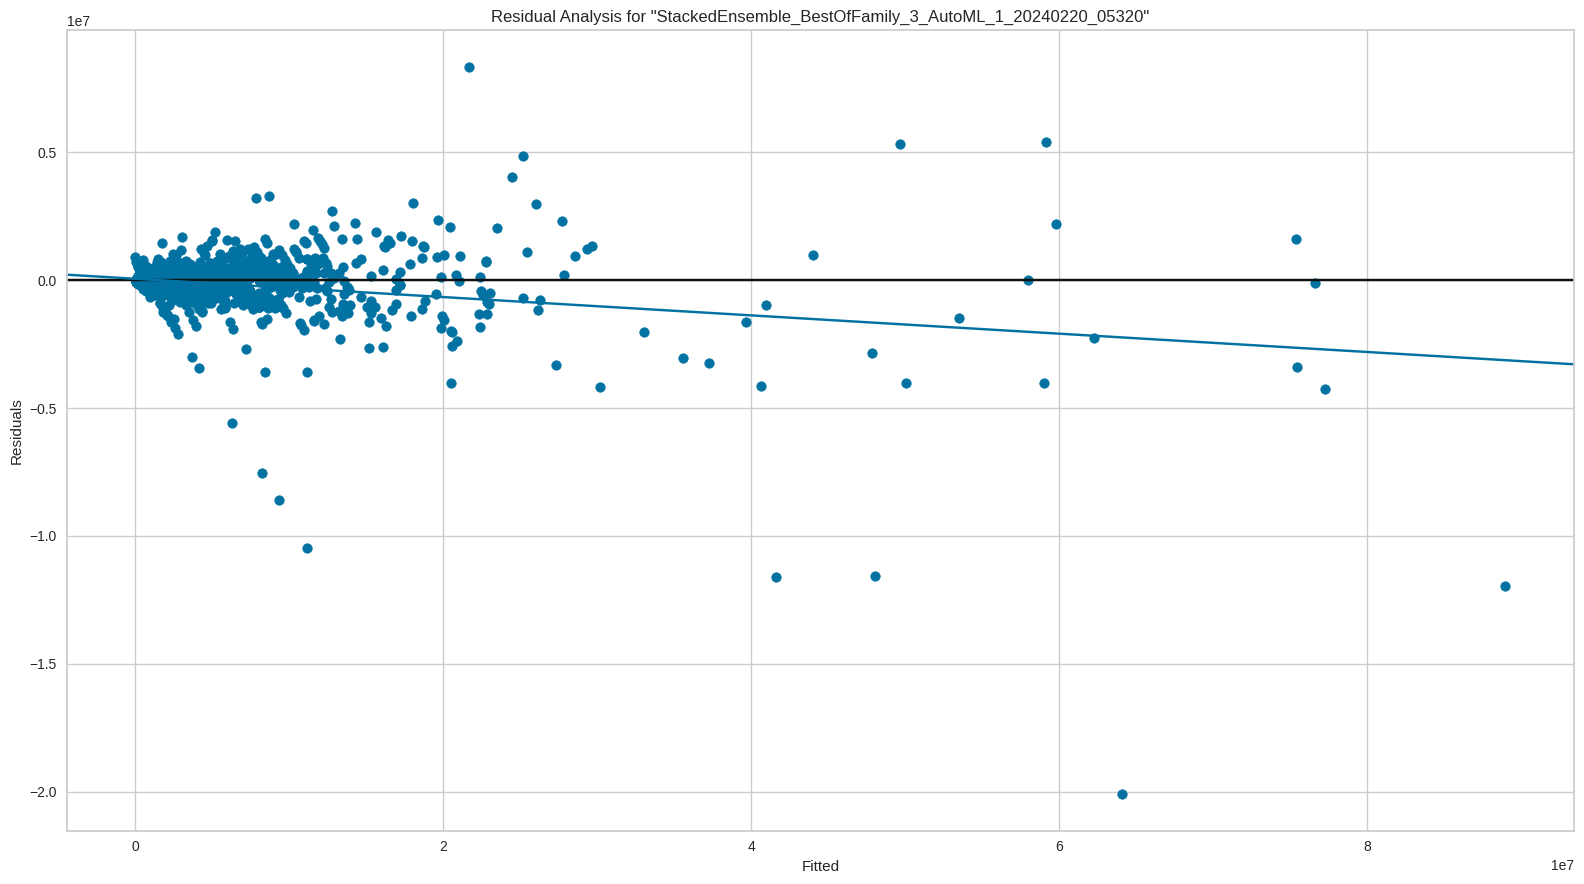

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

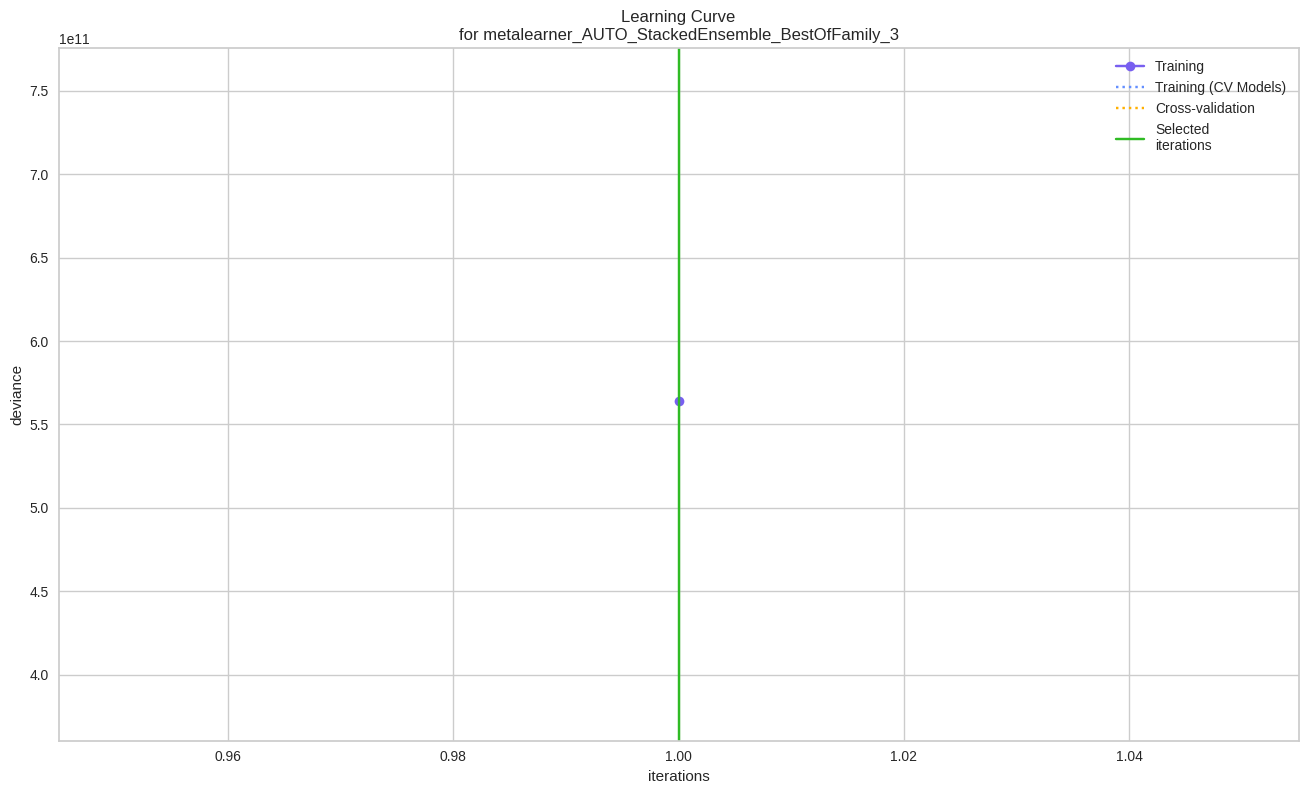

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

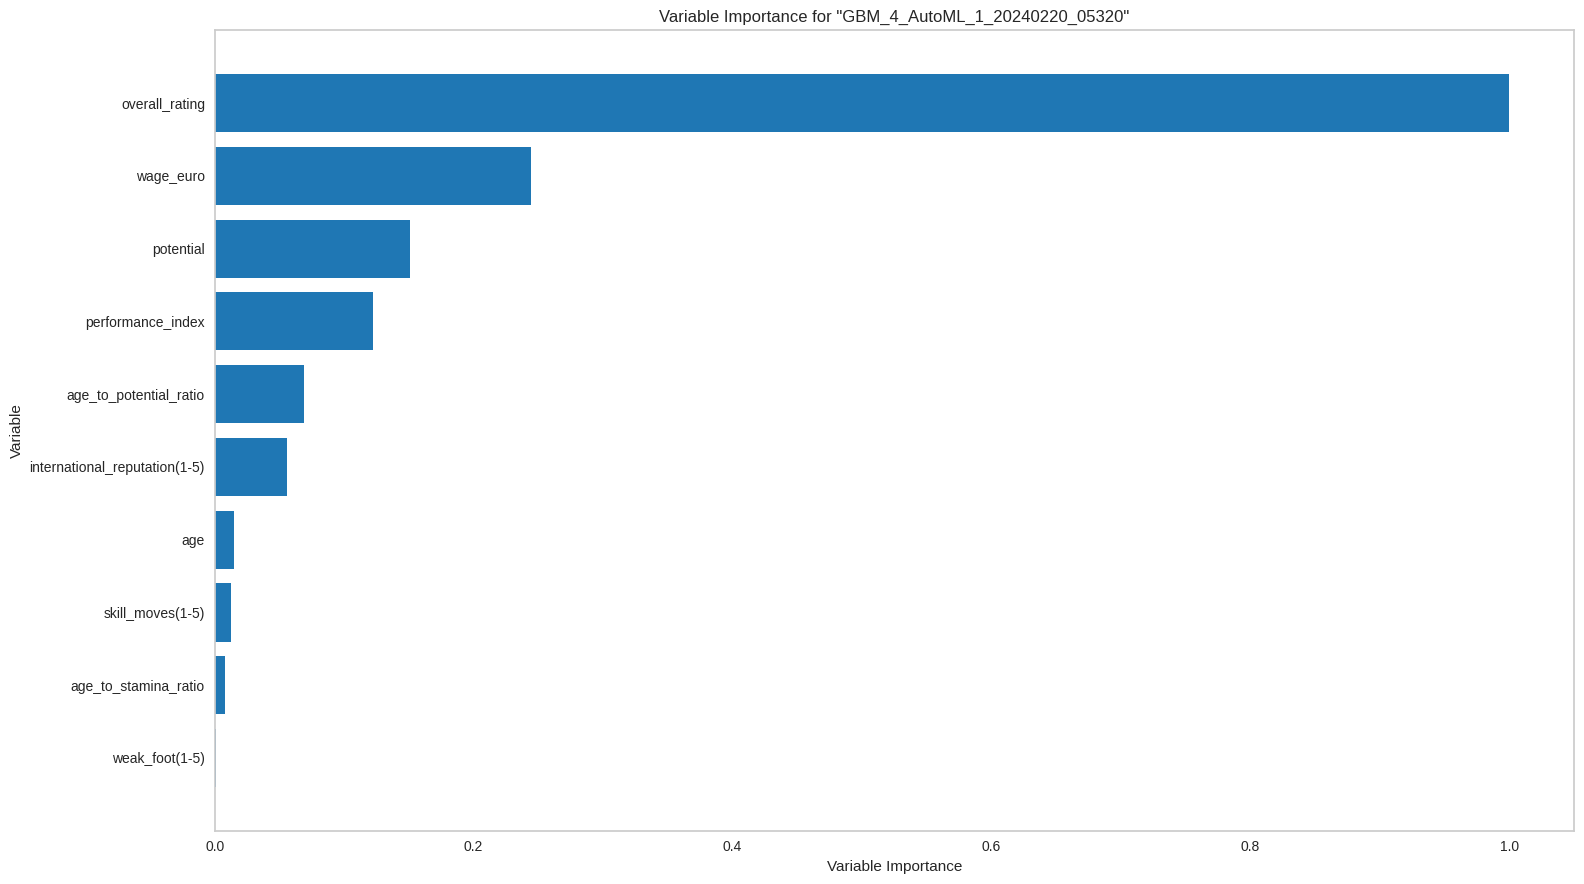

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

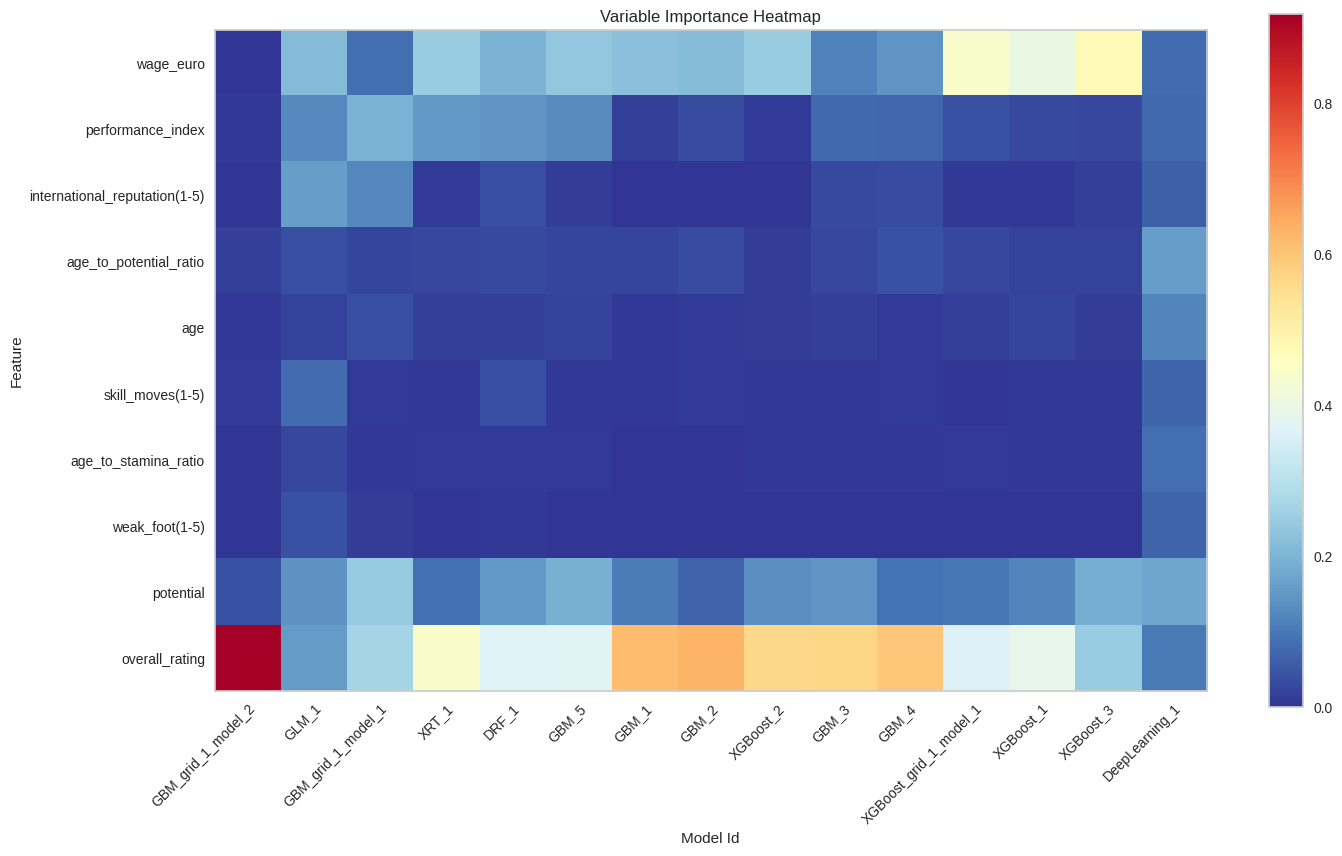

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

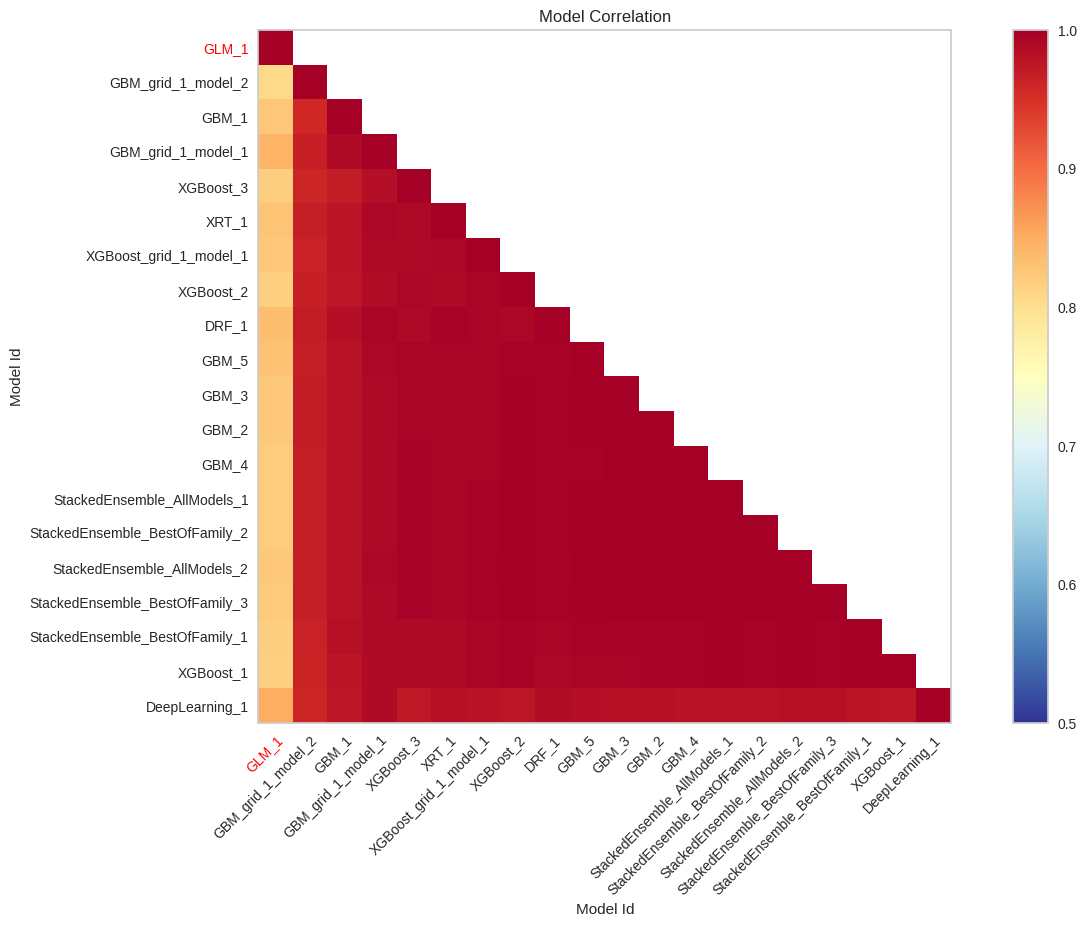

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

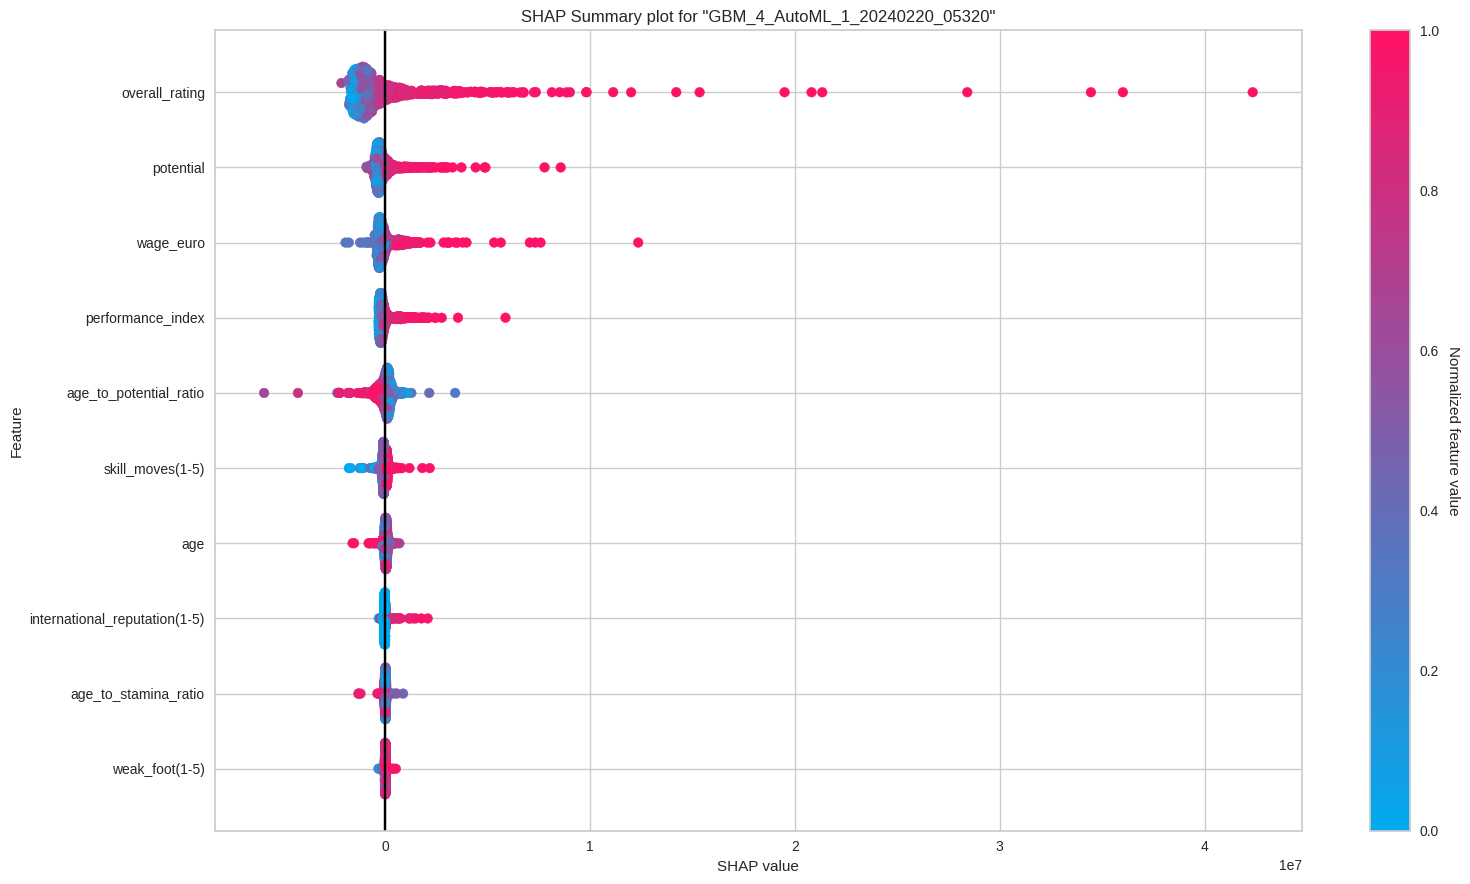

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

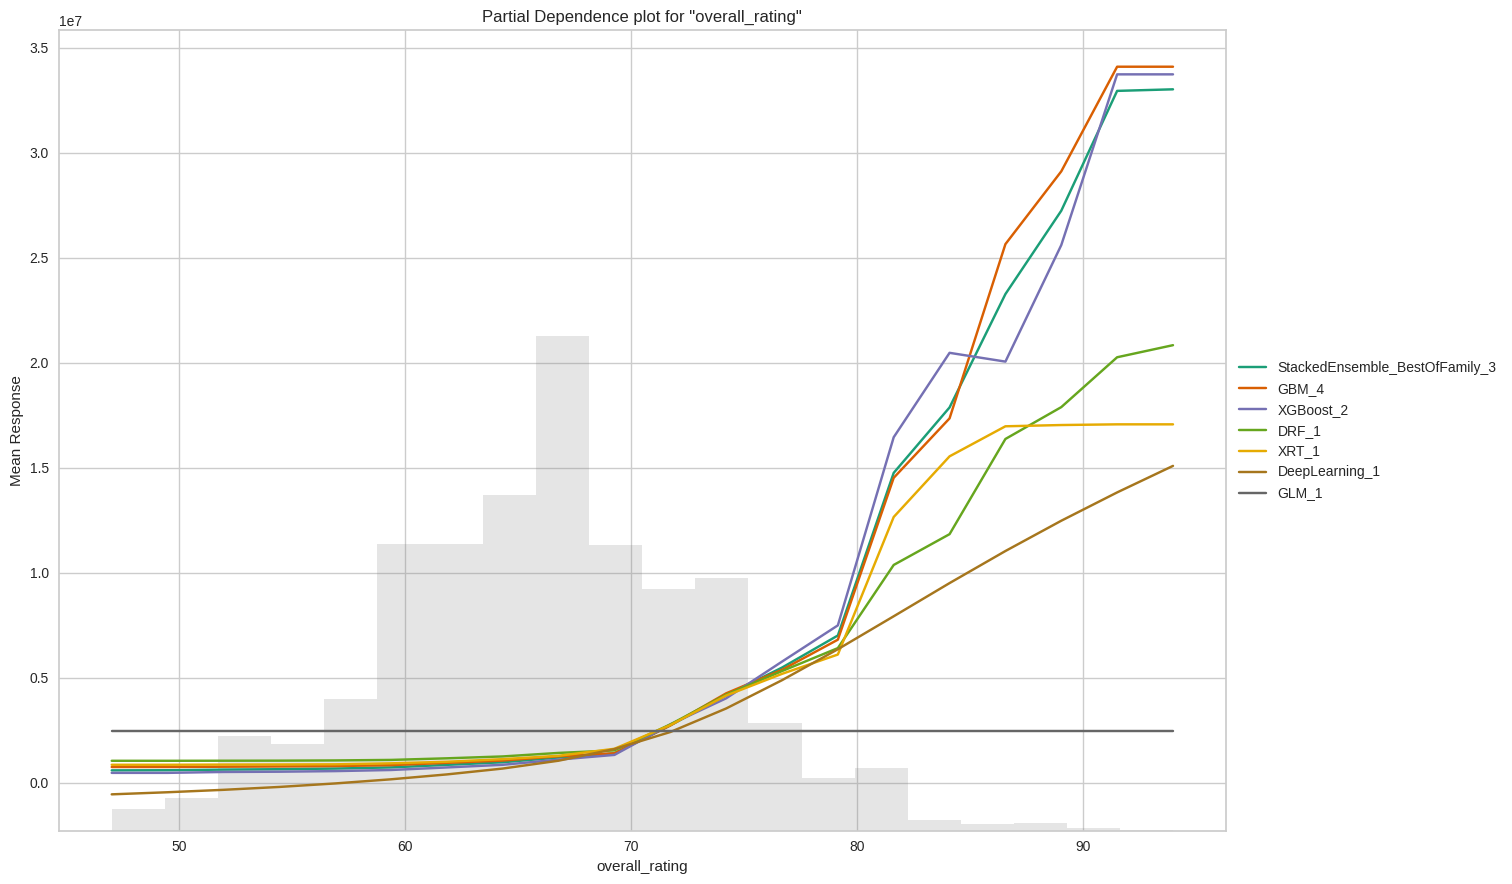

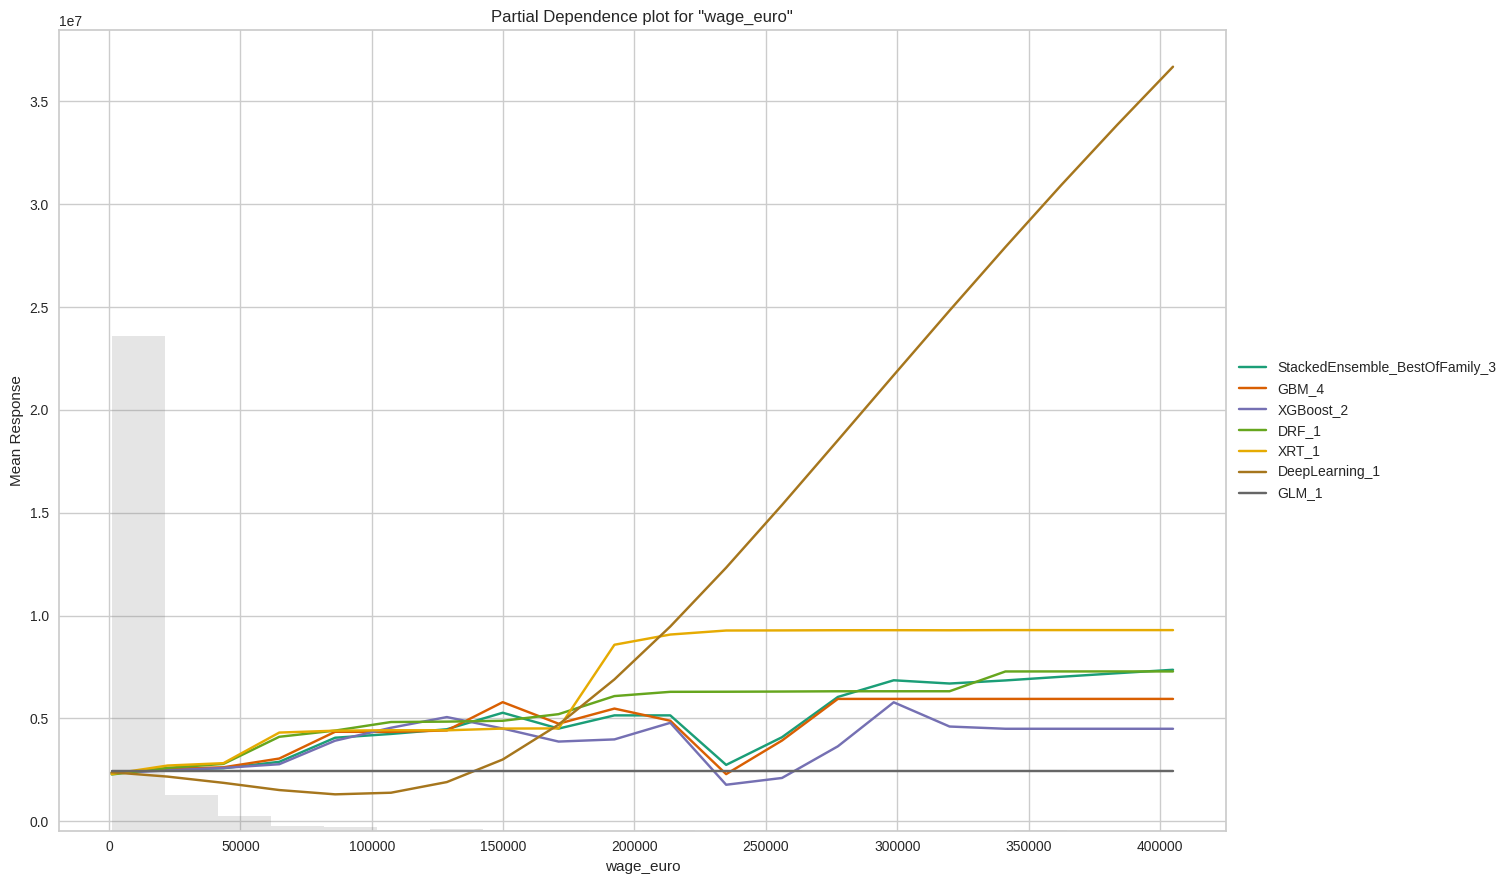

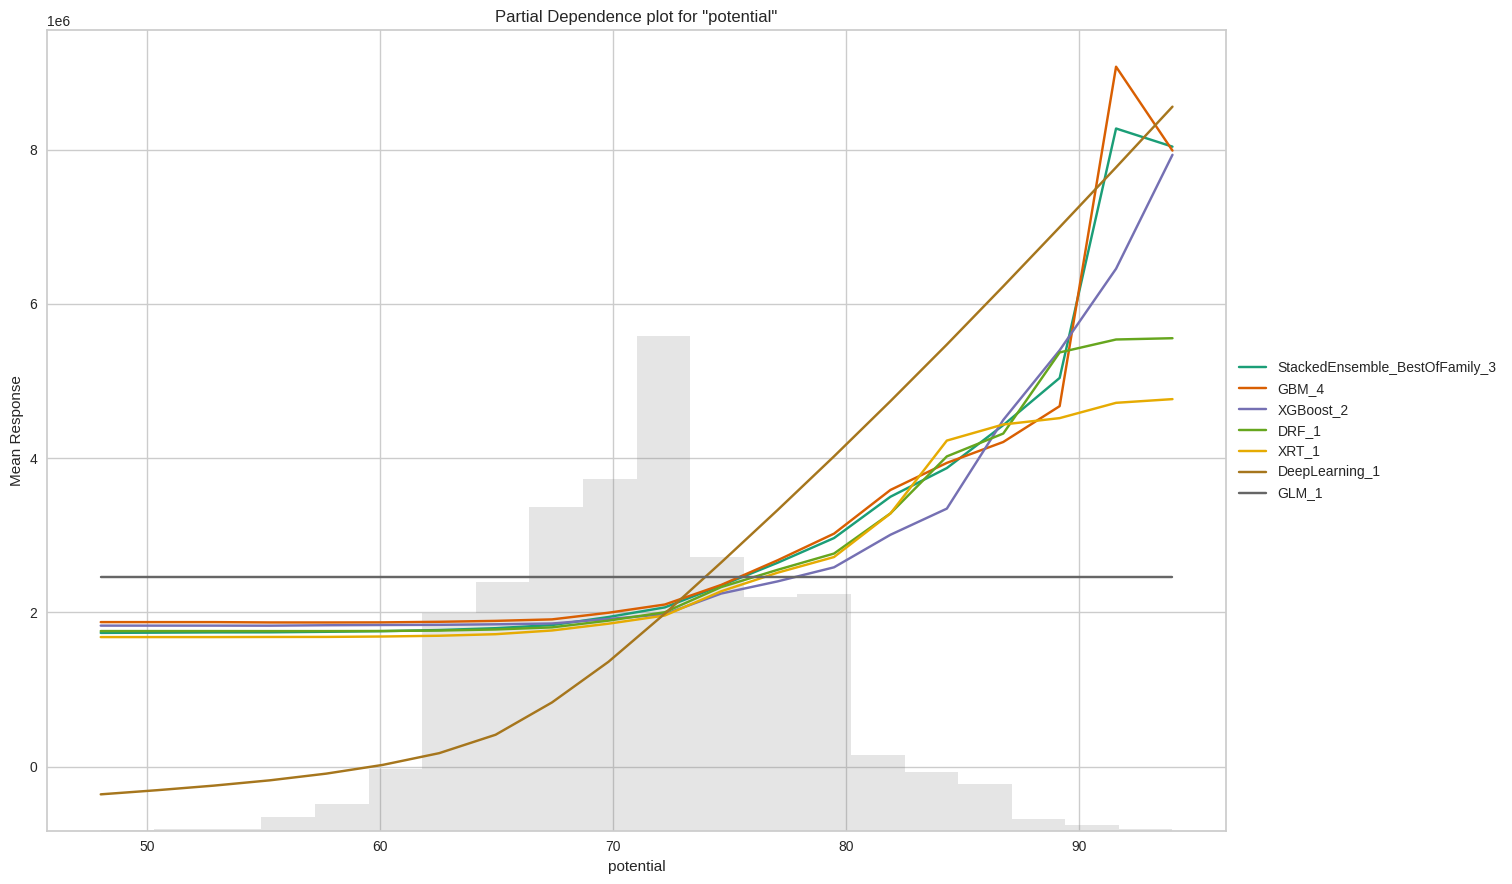

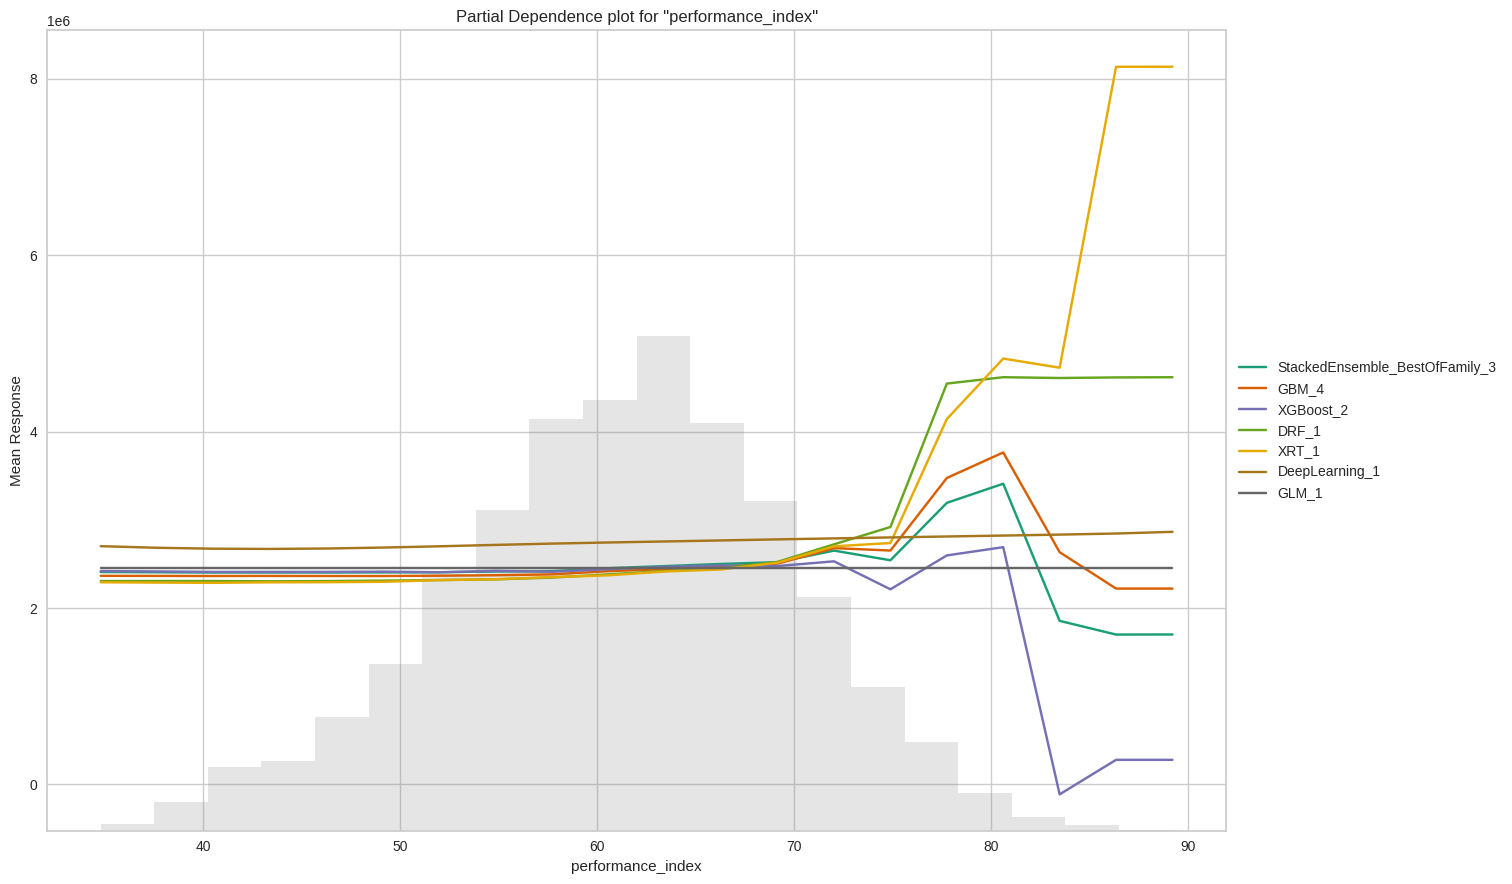

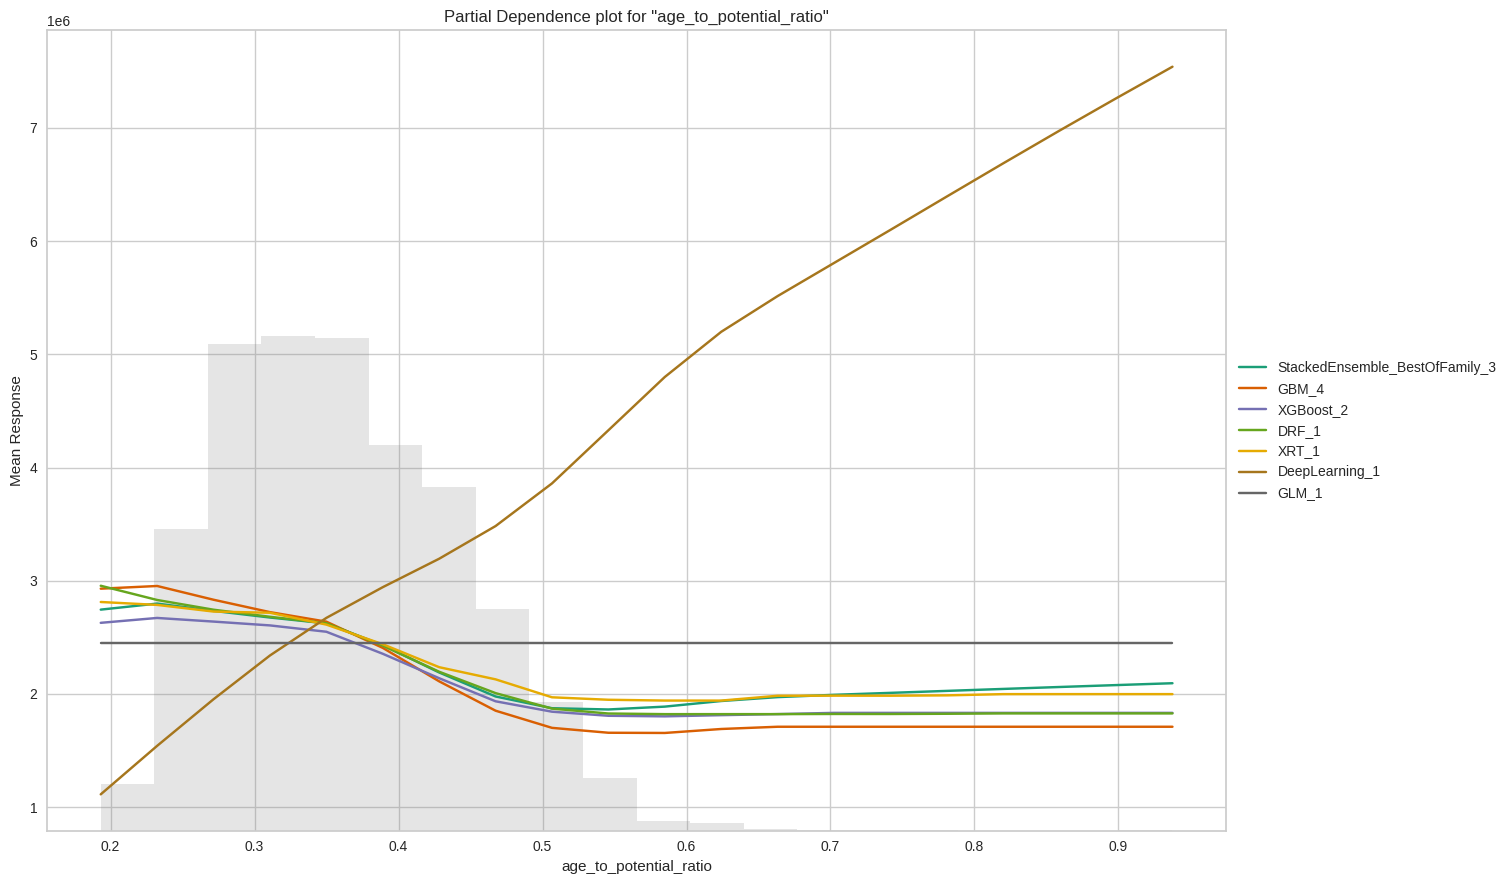

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
exa = aml.explain(data_test)

## Partial Dependence

**The given graph is a partial dependence plot (PDP) for the feature "overall_rating" of a machine learning model. The plot shows the relationship between the "overall_rating" and the mean response of the model. The x-axis represents the "overall_rating" values, and the y-axis represents the mean response. Here's a breakdown of the points in the graph:**

* x-axis: The "overall_rating" values ranging from 0 to 100 with an increment of 10.
* y-axis: The mean response of the machine learning model, ranging from approximately -1.5 to 25.
* Horizontal line at y = 0: This line represents the baseline, where the mean response is zero.
* Vertical lines at x = 50 and x = 70: These lines divide the graph into three sections, showing the mean response for different "overall_rating" ranges.
* Curves for different models: Each curve represents the mean response for a specific machine learning model. The models are:
StackedEnsemble_BestOfFamily_3
      GBM_4
      XGBoost 2
      DRF_1
      XRT 1
      DeepLearning 1
      GLM_1
* Mean response for each model:
** StackedEnsemble_BestOfFamily_3: The mean response increases steadily from -1.5 to approximately 15 as the "overall_rating" increases from 0 to 100.
** GBM_4: The mean response increases rapidly from -1.5 to approximately 10 as the "overall_rating" increases from 0 to 50, then it increases more gradually to around 20 for "overall_rating" values between 50 and 100.
** XGBoost 2: The mean response increases rapidly from -1.5 to approximately 10 as the "overall_rating" increases from 0 to 50, then it increases more gradually to around 20 for "overall_rating" values between 50 and 100.
** DRF_1: The mean response increases gradually from -1.5 to approximately 5 as the "overall_rating" increases from 0 to 50, then it increases more rapidly to around 15 for "overall_rating" values between 50 and 100.
** XRT 1: The mean response increases gradually from -1.5 to approximately 5 as the "overall_rating" increases from 0 to 50, then it increases more rapidly to around 15 for "overall_rating" values between 50 and 100.
** DeepLearning 1: The mean response increases rapidly from -1.5 to approximately 10 as the "overall_rating" increases from 0 to 50, then it increases more gradually to around 20 for "overall_rating" values between 50 and 100.
** GLM_1: The mean response increases gradually from -1.5 to approximately 5 as the "overall_rating" increases from 0 to 50, then it increases more rapidly to around 15 for "overall_rating" values between 50 and 100.

In summary, the PDP shows the relationship between the "overall_rating" and the mean response for different machine learning models. The StackedEnsemble_BestOfFamily_3 model has the highest mean response, while the GLM_1 model has the lowest mean response for a given "overall_rating"


## SHAP summary

* Feature importance: The importance of each feature is indicated by the position of the feature on the x-axis. The features closer to the right side of the plot have a higher importance. In this case, the most important features are:
          overall_rating
          potential
          age
          international reputation (1-5)
          wage euro
* SHAP value distribution: The distribution of SHAP values for each feature is represented by the dots on the plot. The more dots there are in a specific region, the more instances of that feature value contribute to the prediction.
For example, the "overall_rating" feature has a high concentration of dots around the average SHAP value, indicating that this feature has a moderate impact on the prediction for most instances.
* The "potential" feature has a wide distribution of SHAP values, suggesting that this feature has a significant impact on the prediction for some instances.
The "age" feature has a higher concentration of dots with negative SHAP values, indicating that older age tends to decrease the prediction.
In summary, the SHAP summary plot provides a visual representation of feature importance and the distribution of SHAP values for each feature. It helps to understand how each feature contributes to the prediction and the relationship between feature values and the SHAP values.

Is

# 1. Is the relationship significant?

yes, because the R-sqaured is 0.98 which is very high and all features' p value is 0 except age, skill_moves(1-5), age_to_stamina, weak_foot(1-5), so the relationship is very much significant

# 2. Are any model assumptions violated?

No, the model is a multiclassification which make sense to all models in AutoML.

# 3. Is there any multicollinearity in the model?

yes, from the VIF data, we could know that all variables have correlationship with each other except Weak_foot(1-5), International_reputation(1-5), skill_moves(1-5), age_to_stamina_ratio.

# 4. In the multivariate models are predictor variables independent of all the other predictor variables?

No, they are not all independent of each other,especially Age,age_to_potential_ratio,overall_rating, we can know that from the correlation heap map.

# 5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.


the most significant predictor variable is overall_rating, and weak_foot(1-5) is the most insiginificant one.

# 5. Does the model make sense?
yes, the qustion is a multiclassfication question and models in AutoML can deal with it.

# 6. Does regularization help?

Yes, the rmse from the best model is 353576.6820365311 which is very high, however, in regularization, the rmse is 2486714.911863868

# 7. Which independent variables are significant?

the most significant predictor variable is Overall_rating

# 8. Which hyperparameters are important?

all hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

In [157]:
# Convert data to H2OFrame
data_h2o = h2o.H2OFrame(data)

# Split the H2OFrame into train, validate, and test sets
train, validate, test = data_h2o.split_frame(ratios=[0.6, 0.2], seed=42)

# Display the number of rows in each set
print("Train set:", train.nrow)
print("Validation set:", validate.nrow)
print("Test set:", test.nrow)


Train set: 10809
Validation set: 3626
Test set: 3519


In [158]:
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

In [159]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [160]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [163]:
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Create H2OGridSearch object
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria
)


In [164]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.6000000000000001   0.1           4.0          1.0                 gbm_grid2_model_22  425070577584.64355
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  443900829314.6018
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   444814045227.70917
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   469204739937.69055
     0.5                  0.1           4.0          0.8                 gbm_grid2_model_33  489805269195.26794
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  502446205861.9388
     0.6000000000000001   0.09          3.0          0.9                 gbm_grid2_model_18  510640488102.8167
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  511109616438.42725
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  524122976172.3802
     0.6000000000000001   0.09          3.0          0.8                 gbm_grid2_model_1   525641972334.69165
---  ---                  ---           ---          ---                 ---                 ---
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   1713494365181.5896
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  2182342229539.513
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  2327422933792.491
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  2805777379801.08
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  3920672941591.597
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  4555240104277.863
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  5542286827634.113
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  5638917528365.187
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  8257919318493.931
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  8278868514479.102
[36 rows x 7 columns]

In [165]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [166]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.6000000000000001   0.1           4.0          1.0                 gbm_grid2_model_22  425070577584.64355
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  443900829314.6018
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   444814045227.70917
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   469204739937.69055
     0.5                  0.1           4.0          0.8                 gbm_grid2_model_33  489805269195.26794
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  502446205861.9388
     0.6000000000000001   0.09          3.0          0.9                 gbm_grid2_model_18  510640488102.8167
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  511109616438.42725
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  524122976172.3802
     0.6000000000000001   0.09          3.0          0.8                 gbm_grid2_model_1   525641972334.69165
---  ---                  ---           ---          ---                 ---                 ---
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   1713494365181.5896
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  2182342229539.513
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  2327422933792.491
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  2805777379801.08
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  3920672941591.597
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  4555240104277.863
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  5542286827634.113
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  5638917528365.187
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  8257919318493.931
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  8278868514479.102
[36 rows x 7 columns]

In [167]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [168]:
models = gbm_gridperf2.models

In [169]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [170]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [171]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [172]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.6        0.10          4          1.0       4.250706e+11
1               0.9        0.09          8          0.9       4.439008e+11
2               0.5        0.10          9          1.0       4.448140e+11
3               0.5        0.05          7          0.9       4.692047e+11
4               0.5        0.10          4          0.8       4.898053e+11
5               0.9        0.10          4          0.7       5.024462e+11
6               0.6        0.09          3          0.9       5.106405e+11
7               0.9        0.07          4          0.9       5.111096e+11
8               0.4        0.08          6          0.9       5.241230e+11
9               0.6        0.09          3          0.8       5.256420e+11
10              0.8        0.06          9          0.6       5.595939e+11
11              0.7        0.06          5          0.6       5.715643e+11
12              0.9      

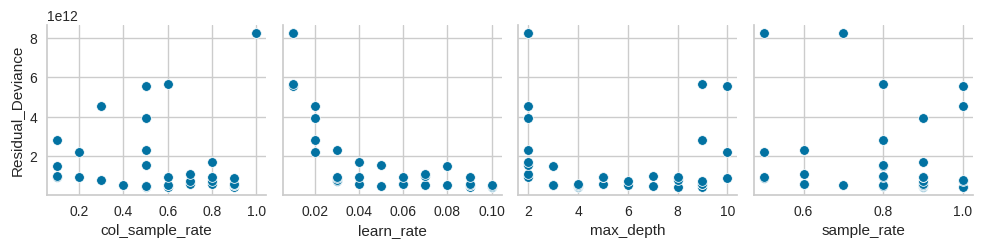

In [173]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Hyperparameter Tuning Analysis

*   This is a summary of hyperparameter tuning for an XGBoost model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.
*   Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 1.0, learn_rate of 0.10, max_depth of 10, and sample_rate of 1.0, with a Residual Deviance of 0.354805. The next best models had Residual Deviances in the range of 0.36-0.39, while the worst-performing models had Residual Deviances above 0.43.
*   Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of an XGBoost model, and that hyperparameter tuning can lead to significant improvements in model performance.



References

* https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
* https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

MIT License

Copyright (c) 2024 AbhiSingh378

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.